<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Web Scraping and Salary Prediction

<br/><br/>

This project was completed during my Data Science Immersive bootcamp at General Assembly in London.

The project aims to determine the industry factors that are most important in predicting the salary amounts in various data related fields.  
To achieve this, I decided to collect and analyse data from a job aggregator website, Indeed.com.  
To limit the scope, it was suggested to *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others relevant terms. In addition, I could decrease the scope by *limiting the search to a single region.*  



**Goals:**
- Scrape data from a job aggregation tool in order to collect the data to best answer the initial question.
- Discover which job features impact salary the most.
- Create a classification model to predict whether a job will pay more or less than the median salary, based on the features of the job.  

<br/><br/>

### Factors that impact salary

To predict salary the most appropriate approach would be a regression model.
Here instead I just want to estimate which factors (like location, job title, job level, industry sector) lead to high or low salary and work with a classification model. To do so, I'll split the salary into two groups of high and low salary, by choosing the median salary as a threshold (in principle I could choose any single or multiple splitting points).  

<br/><br/>

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import re

In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from time import time, sleep

In [3]:
# run to avoid warnings
import warnings
warnings.filterwarnings('ignore')

### Extract data

In [4]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

In [5]:
r = requests.get(URL)
soup = BeautifulSoup(r.text, 'html.parser')

### Functions to extract job details: location, company, job, salary....

In [5]:
def get_job_title(cards):
    jt = card.find('h2', class_='jobTitle').text.strip('\\\n ')
    job_title.append(jt)
    return


In [6]:
def get_company_name(cards):
    try:
        cn = card.find('span', class_='companyName').text.strip('\\\n ')
    except:
        cn = 'Not Available'
    company_name.append(cn)
    return
    

In [7]:
def get_company_rating(cards):
    try:
        cr = card.find('span', class_='ratingNumber').text.strip('\\\n ')
    except Exception as e:
        cr = 'Not Available'
    company_rating.append(cr)
    return
    

In [8]:
def get_company_location(cards):
    cl = card.find('div', class_='companyLocation').text.strip('\\\n ')
    cl = re.sub('\\\\\\n\s*', ' ', cl)
    cl = re.sub('\xa0', ' ', cl)
    company_location.append(cl)
    return
    

In [9]:
def get_salary_amount(cards):
    try:
        sa = card.find('div', class_='salary-snippet-container').text.strip('\\\n ')
    except:
        sa = 'Not Available'
    salary_amount.append(sa)
    return
    

In [10]:
def get_salary_estimate(cards):
    try:
        se = card.find('span', class_='estimated-salary').text.strip('\\\n ')
    except:
        se = 'Not Available'
    salary_estimate.append(se)
    return
    

In [11]:
def get_multi_candidate(cards):
    try:
        mc = card.find('div', class_='hiringMultipleCandidatesCaption').text.strip('\\\n ')
    except:
        mc = 'Not Available'
    multi_candidate.append(mc)
    return
    

In [12]:
def get_job_snippet(cards):
    try:
        js = card.find('div', class_='job-snippet').text.strip('\\\n ')
        js = re.sub('\\\\\\n\s*', ' ', js)
        js = re.sub('\\n', ' ', js)
    except:
        js = 'Not Available'
    job_snippet.append(js)
    return


In [ ]:
job_title
company_name
company_rating
company_location
salary_amount
salary_estimate
multi_candidate
job_snippet

In [ ]:
def get_job_title(result):
    job = []
    for role in result.find_all('div', attrs={'class':'result'}): 
        try:
            job.append(role.find('div', attrs={'class':'title'}).text.strip()) 
        except:
            job.append(np.nan)
    return job

In [ ]:
def get_company_name(result):
    company = []
    for role in result.find_all('div', attrs={'class':'result'}): 
        try:
            company.append(role.find('span', attrs={'class':'company'}).text.strip())
        except:
            company.append(np.nan)
    return company

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search.
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different.

In [20]:
YOUR_CITY = 'Albuquerque'

In [132]:
# Saving the scraping results as CSV
# results.to_csv('datasets/scrape/results_scrape.csv', encoding='utf-8', index=False)

In [4]:
# Loading the data from CSV for consistency reasons
results_m = pd.read_csv('datasets/scrape/results_scrape.csv')

In [5]:
results_m.head(17)

,index,job_title,company_name,company_rating,company_location,salary_amount,salary_estimate,multi_candidate,job_snippet
0,0,Student Research Assistant,University of New Mexico,4.0,"Albuquerque, NM 87106 (University Hts area)",$16 an hour,Not Available,Not Available,Informatics. Approaches include machine learni...
1,1,Data Scientist Manager,Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $178K - $225K a year,Not Available,Expert understanding of Python and other commo...
2,2,"Data Scientist, Senior",Booz Allen Hamilton,3.9,"Remote in Kirtland AFB, NM",Not Available,Estimated $95.2K - $121K a year,Not Available,"Experience with natural language processing, s..."
3,3,Solution Architecture Manager,Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $179K - $227K a year,Not Available,"One or more programming languages (i.e. C#, Ja..."
4,4,"Manager, Cognitive and AI - Remote",KPMG,3.9,"Remote in Albuquerque, NM 87110",Not Available,Estimated $122K - $154K a year,Not Available,Manage all Cognitive projects and Cognitive an...
5,5,Software Engineer (JR),Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $102K - $129K a year,Not Available,The successful candidate will have experience ...
6,6,Data Science Manager,Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $120K - $152K a year,Not Available,The successful candidate will be experienced w...
7,7,"Software Engineer, Manager - Tax Analysis & De...",Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $150K - $190K a year,Not Available,Experience working with one or more from the f...
8,8,"Lead Software Engineer, Tax Analysis & Debt In...",Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $129K - $163K a year,Not Available,Experience working with one or more from the f...
9,9,Sr. Software Engineer,Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $106K - $135K a year,Not Available,The successful candidate will have experience ...


In [6]:
results_m.shape

(15755, 9)

In [7]:
results_m.drop(columns='index', inplace=True)

In [8]:
results_m.shape

(15755, 8)

In [9]:
# Removing duplicate entries
results_m.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [10]:
results_m.shape

(13599, 8)

In [11]:
results_m.salary_amount.value_counts()

Not Available                 10420
$150,000 - $200,000 a year       60
$82,100 - $146,900 a year        45
$90,000 - $110,000 a year        43
$66,100 - $118,300 a year        29
                              ...  
$52,650 - $90,000 a year          1
$110,000 - $120,000 a year        1
$160,130 - $268,093 a year        1
$100,000 - $350,000 a year        1
$42,596 - $49,310 a year          1
Name: salary_amount, Length: 1810, dtype: int64

In [12]:
list(results_m.salary_amount.unique())

['$16 an hour',
 'Not Available',
 '$150,000 - $230,000 a year',
 '$190,000 - $230,000 a year',
 '$150,000 - $200,000 a year',
 '$275,000 - $400,000 a year',
 '$135,000 - $200,000 a year',
 '$90,000 a year',
 '$80,000 - $200,000 a year',
 '$135,000 - $155,000 a year',
 '$110,000 - $400,000 a year',
 '$183,000 - $208,000 a year',
 '$135,000 - $185,000 a year',
 '$100,000 - $140,000 a year',
 '$90,000 - $110,000 a year',
 '$70,000 - $130,000 a year',
 '$95,000 - $209,000 a year',
 '$58,955 - $74,991 a year',
 '$53,760 a year',
 '$85,000 - $170,400 a year',
 '$60,000 - $100,000 a year',
 '$18.00 - $20.55 an hour',
 '$60 - $70 an hour',
 '$100,000 - $160,000 a year',
 '$65 - $90 an hour',
 '$15 - $20 an hour',
 '$150,000 - $180,000 a year',
 '$110,000 - $140,000 a year',
 '$80,000 - $110,000 a year',
 '$65 a day',
 '$147,250 - $235,000 a year',
 '$126,700 - $145,000 a year',
 '$22.88 - $38.31 an hour',
 '$52.52 - $82.69 an hour',
 '$47,600 - $79,699 a year',
 '$36.49 - $62.52 an hour',
 '$

In [13]:
# Removing entries without salary amount information
results_m = results_m[results_m.salary_amount != 'Not Available']

In [14]:
results_m.shape

(3179, 8)

In [15]:
# Removing entries with salary amount refering to hour, day
results_m = results_m[~results_m.salary_amount.str.contains('hour')]
results_m = results_m[~results_m.salary_amount.str.contains('day')]
results_m.shape

(2765, 8)

In [193]:
# Saving the modified dataframe as CSV
results_m.to_csv('datasets/mod/results_m.csv', encoding='utf-8', index=False)

The dataset is slightly small for this exercise, I will increase the number of results trying a different approach.

I am going to define 3 tiers for the US cities, based on the number of job postings.  
Tier 1 contains cities with more than 480 jobs for data scientist on Indeed.
Tier 2 contains cities with a number of jobs between 120 and 480.
Tier 3 contains cities with less than 120 jobs.

In [173]:
# Saving the scraping results as CSV
# us01_res.to_csv('datasets/scrape/us01_res.csv', encoding='utf-8', index=False)

In [16]:
# Loading the data from CSV for consistency reasons
us01_m = pd.read_csv('datasets/scrape/us01_res.csv')

In [17]:
us01_m.head(17)

,index,job_title,company_name,company_rating,company_location,salary_amount,salary_estimate,multi_candidate,job_snippet
0,0,Machine Learning/Natural Language Processing R...,"Hitachi America, Ltd.",3.8,"Santa Clara, CA 95054",Not Available,Not Available,Not Available,Strong research experience in natural language...
1,1,"Research Scientist, Natural Language Processin...",ByteDance,4.1,"Mountain View, CA+6 locations",Not Available,Not Available,Not Available,Conduct cutting-edge research in machine learn...
2,2,Vision-and-Language Understanding,Honda Research Institute USA,Not Available,"San Jose, CA",Not Available,Estimated $60.8K - $76.9K a year,Not Available,Strong familiarity with computer vision and na...
3,3,Member of Research Staff - Fujitsu Research,Fujitsu,3.6,"Sunnyvale, CA 94085 (East Murphy area)",Not Available,Not Available,Not Available,"Strong background and knowledge in AutoML, mac..."
4,4,Machine Learning Scientist (L5) - Programming ...,Netflix,3.9,"Los Gatos, CA+1 location",Not Available,Not Available,Not Available,3+ years of experience as a hands-on expert-le...
5,5,AI/ML - Machine Learning Engineer and Scientis...,Apple,4.1,"Cupertino, CA+9 locations",Not Available,Not Available,Not Available,We are looking for ML engineers and researcher...
6,6,Data Scientist I,The Trade Desk,4.0,"San Jose, CA 95113 (Downtown area)",Not Available,Estimated $111K - $140K a year,Not Available,You have some experience with big data technol...
7,7,Linguistics Analyst- Text to Speech (TTS) Italian,Accenture,4.0,"San Jose, CA 95113 (Downtown area)+1 location",Not Available,Not Available,Not Available,The Linguistics Analyst Text to Speech TTS Ita...
8,8,Data Scientist,Uber,3.6,"Sunnyvale, CA 94086",Not Available,Not Available,Hiring multiple candidates,The product development roadmap includes sever...
9,9,Research Scientist (L5) - Product Machine Lear...,Netflix,3.9,"Los Gatos, CA",Not Available,Not Available,Not Available,You will develop expertise in the frontiers of...


In [18]:
us01_m.shape

(28628, 9)

In [19]:
us01_m.drop(columns='index', inplace=True)

In [20]:
# Removing duplicate entries
us01_m.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [21]:
us01_m.shape

(12520, 8)

In [22]:
# Removing entries without salary amount information
us01_m = us01_m[us01_m.salary_amount != 'Not Available']

In [23]:
us01_m.shape

(2639, 8)

In [24]:
# Removing entries with salary amount refering to hour, day
us01_m = us01_m[~us01_m.salary_amount.str.contains('hour')]
us01_m = us01_m[~us01_m.salary_amount.str.contains('day')]
us01_m.shape

(2380, 8)

In [203]:
# Saving the modified dataframe as CSV
us01_m.to_csv('datasets/mod/us01_m.csv', encoding='utf-8', index=False)

In [204]:
# Saving the scraping results as CSV
# us02_res.to_csv('datasets/scrape/us02_res.csv', encoding='utf-8', index=False)

In [25]:
# Loading the data from CSV for consistency reasons
us02_m = pd.read_csv('datasets/scrape/us02_res.csv')

In [26]:
us02_m.head(17)

,index,job_title,company_name,company_rating,company_location,salary_amount,salary_estimate,multi_candidate,job_snippet
0,0,Security Research Engineer (Full Time) United ...,Cisco Systems,4.1,"Remote in Research Triangle Park, NC",Not Available,Not Available,Not Available,US Citizenship is required due to the nature o...
1,1,Research Agreements Manager,Duke University,4.0,"Durham, NC 27710 (Duke West Campus area)",Not Available,Not Available,Not Available,"Experience in a legal, human research protecti..."
2,2,Clinical Research Associate II,Veristat,4.2,"Remote in Morrisville, NC 27560",Not Available,Not Available,Not Available,May provide input into the development of clin...
3,3,BTC - RESEARCH ASSOCIATE,Duke University,4.0,"Durham, NC 27710 (Duke West Campus area)",Not Available,Not Available,Not Available,Contribute to supporting the clinical and tran...
4,4,Clinical Data Manager,MM Infotech,Not Available,"Durham, NC",Not Available,Not Available,Not Available,Coordinates activities including: medical codi...
5,5,"Staff Scientist I, Pre-Clinical Toxicology",BD,3.8,"Research Triangle Park, NC",Not Available,Not Available,Not Available,"This position addresses the toxicology, biocom..."
6,6,"Regulatory Affairs Scientist - (Raleigh, NC or...",UCB S.A.,3.8,"Raleigh, NC 27617 (Northwest Raleigh area)",Not Available,Not Available,Not Available,This person will be responsible for preparing ...
7,7,"DIRECTOR, DIVERSITY EQUITY AND INCLUSION - SAN...",Duke University,4.0,"Durham, NC 27710 (Duke West Campus area)",Not Available,Not Available,Not Available,"The Director of Diversity, Equity, and Inclusi..."
8,8,Senior Clinical Research Associate (CRA),Ergomed,Not Available,"Raleigh, NC",Not Available,Not Available,Not Available,Carry out site selection and feasibility. To a...
9,9,"Lead Scientist, Team Leader",Catalent,3.1,"Morrisville, NC 27560",Not Available,Not Available,Not Available,Understands the elements of a regulatory CMC f...


In [27]:
us02_m.shape

(18579, 9)

In [28]:
us02_m.drop(columns='index', inplace=True)

In [29]:
# Removing duplicate entries
us02_m.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [30]:
us02_m.shape

(12041, 8)

In [31]:
# Removing entries without salary amount information
us02_m = us02_m[us02_m.salary_amount != 'Not Available']

In [32]:
us02_m.shape

(2485, 8)

In [33]:
# Removing entries with salary amount refering to hour, day
us02_m = us02_m[~us02_m.salary_amount.str.contains('hour')]
us02_m = us02_m[~us02_m.salary_amount.str.contains('day')]
us02_m.shape

(2220, 8)

In [214]:
# Saving the modified dataframe as CSV
us02_m.to_csv('datasets/mod/us02_m.csv', encoding='utf-8', index=False)

In [215]:
# Saving the scraping results as CSV
# us03_res.to_csv('datasets/scrape/us03_res.csv', encoding='utf-8', index=False)

In [34]:
# Loading the data from CSV for consistency reasons
us03_m = pd.read_csv('datasets/scrape/us03_res.csv')

In [35]:
us03_m.head(17)

,index,job_title,company_name,company_rating,company_location,salary_amount,salary_estimate,multi_candidate,job_snippet
0,0,Student Research Assistant,University of New Mexico,4.0,"Albuquerque, NM 87106 (University Hts area)",$16 an hour,Not Available,Not Available,Informatics. Approaches include machine learni...
1,1,Data Scientist Manager,Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $178K - $225K a year,Not Available,Expert understanding of Python and other commo...
2,2,"Data Scientist, Senior",Booz Allen Hamilton,3.9,"Remote in Kirtland AFB, NM",Not Available,Estimated $95.2K - $121K a year,Not Available,"Experience with natural language processing, s..."
3,3,Solution Architecture Manager,Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $179K - $227K a year,Not Available,"One or more programming languages (i.e. C#, Ja..."
4,4,Software Engineer (JR),Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $102K - $129K a year,Not Available,The successful candidate will have experience ...
5,5,"Manager, Cognitive and AI - Remote",KPMG,3.9,"Remote in Albuquerque, NM 87110",Not Available,Estimated $122K - $154K a year,Not Available,Manage all Cognitive projects and Cognitive an...
6,6,"Software Engineer, Manager - Tax Analysis & De...",Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $150K - $190K a year,Not Available,Experience working with one or more from the f...
7,7,Data Science Manager,Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $120K - $152K a year,Not Available,The successful candidate will be experienced w...
8,8,"Lead Software Engineer, Tax Analysis & Debt In...",Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $129K - $163K a year,Not Available,Experience working with one or more from the f...
9,9,Sr. Software Engineer,Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $106K - $135K a year,Not Available,The successful candidate will have experience ...


In [36]:
us03_m.shape

(8162, 9)

In [37]:
us03_m.drop(columns='index', inplace=True)

In [38]:
# Removing duplicate entries
us03_m.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [39]:
us03_m.shape

(6857, 8)

In [40]:
# Removing entries without salary amount information
us03_m = us03_m[us03_m.salary_amount != 'Not Available']

In [41]:
us03_m.shape

(1419, 8)

In [42]:
# Removing entries with salary amount refering to hour, day
us03_m = us03_m[~us03_m.salary_amount.str.contains('hour')]
us03_m = us03_m[~us03_m.salary_amount.str.contains('day')]
us03_m.shape

(1137, 8)

In [225]:
# Saving the modified dataframe as CSV
us03_m.to_csv('datasets/mod/us03_m.csv', encoding='utf-8', index=False)

The datasets for the 3 tiers have a total of 5,737 entries after removing duplicates and unusable salary information.

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

I am going to perform a final scraping, without tiers but with a bigger number of results.

In [226]:
# Saving the scraping results as CSV
# us_res.to_csv('datasets/scrape/us_res_scrape.csv', encoding='utf-8', index=False)

In [43]:
# Loading the data from CSV for consistency reasons
us_res_m = pd.read_csv('datasets/scrape/us_res_scrape.csv')

In [44]:
us_res_m.head(17)

,index,job_title,company_name,company_rating,company_location,salary_amount,salary_estimate,multi_candidate,job_snippet
0,0,Student Research Assistant,University of New Mexico,4.0,"Albuquerque, NM 87106 (University Hts area)",$16 an hour,Not Available,Not Available,Informatics. Approaches include machine learni...
1,1,Data Scientist Manager,Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $178K - $225K a year,Not Available,Expert understanding of Python and other commo...
2,2,"Data Scientist, Senior",Booz Allen Hamilton,3.9,"Remote in Kirtland AFB, NM",Not Available,Estimated $95.2K - $121K a year,Not Available,"Experience with natural language processing, s..."
3,3,Solution Architecture Manager,Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $179K - $227K a year,Not Available,"One or more programming languages (i.e. C#, Ja..."
4,4,Software Engineer (JR),Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $102K - $129K a year,Not Available,The successful candidate will have experience ...
5,5,"Manager, Cognitive and AI - Remote",KPMG,3.9,"Remote in Albuquerque, NM 87110",Not Available,Estimated $122K - $154K a year,Not Available,Manage all Cognitive projects and Cognitive an...
6,6,"Software Engineer, Manager - Tax Analysis & De...",Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $150K - $190K a year,Not Available,Experience working with one or more from the f...
7,7,Data Science Manager,Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $120K - $152K a year,Not Available,The successful candidate will be experienced w...
8,8,"Lead Software Engineer, Tax Analysis & Debt In...",Deloitte,3.9,"Albuquerque, NM 87102 (Downtown area)",Not Available,Estimated $129K - $163K a year,Not Available,Experience working with one or more from the f...
9,9,Sr. Software Engineer,Alaka`ina Foundation Family of Companies,3.3,"Kirtland AFB, NM",Not Available,Estimated $106K - $135K a year,Not Available,The successful candidate will have experience ...


In [45]:
us_res_m.shape

(239439, 9)

In [46]:
us_res_m.drop(columns='index', inplace=True)

In [47]:
us_res_m.shape

(239439, 8)

In [48]:
# Dropping the company rating, salary estimate, multi candidate and job snippet columns as they don't contain
# relevant information
us_res_m.drop(columns=['company_rating', 'salary_estimate', 'multi_candidate', 'job_snippet'], inplace=True)

In [49]:
us_res_m.head()

,job_title,company_name,company_location,salary_amount
0,Student Research Assistant,University of New Mexico,"Albuquerque, NM 87106 (University Hts area)",$16 an hour
1,Data Scientist Manager,Deloitte,"Albuquerque, NM 87102 (Downtown area)",Not Available
2,"Data Scientist, Senior",Booz Allen Hamilton,"Remote in Kirtland AFB, NM",Not Available
3,Solution Architecture Manager,Deloitte,"Albuquerque, NM 87102 (Downtown area)",Not Available
4,Software Engineer (JR),Alaka`ina Foundation Family of Companies,"Kirtland AFB, NM",Not Available


In [50]:
us_res_m.shape

(239439, 4)

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now.
1. Some of the entries may be duplicated.
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries.

In [51]:
# Removing duplicate entries
us_res_m.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [52]:
us_res_m.shape

(71504, 4)

In [53]:
# Checking the salary amount column
us_res_m.salary_amount.value_counts()

Not Available                               57121
$150,000 - $200,000 a year Employer est.      194
$150,000 - $200,000 a year                     82
$90,000 - $110,000 a year Employer est.        72
$82,100 - $146,900 a year Employer est.        70
                                            ...  
$60,000 - $85,000 a year                        1
$80 - $105 an hour Employer est.                1
$67,500 - $101,640 a year Employer est.         1
$57,500 - $89,200 a year Employer est.          1
$59,000 - $84,000 a year Employer est.          1
Name: salary_amount, Length: 6336, dtype: int64

In [54]:
# Removing entries without salary amount information
us_res_m = us_res_m[us_res_m.salary_amount != 'Not Available']

In [55]:
us_res_m.shape

(14383, 4)

In [56]:
list(us_res_m.salary_amount.unique())

['$16 an hour',
 '$150,000 - $230,000 a year',
 '$190,000 - $230,000 a year',
 '$150,000 - $200,000 a year',
 '$275,000 - $400,000 a year',
 '$135,000 - $200,000 a year',
 '$80,000 - $200,000 a year',
 '$90,000 a year',
 '$135,000 - $155,000 a year',
 '$183,000 - $208,000 a year',
 '$135,000 - $185,000 a year',
 '$110,000 - $400,000 a year',
 '$100,000 - $140,000 a year',
 '$95,000 - $209,000 a year',
 '$90,000 - $110,000 a year',
 '$70,000 - $130,000 a year',
 '$115,800 - $231,600 a year',
 '$58,955 - $74,991 a year',
 '$53,760 a year',
 '$85,000 - $170,400 a year',
 '$60,000 - $100,000 a year',
 '$18.00 - $20.55 an hour',
 '$60 - $70 an hour',
 '$100,000 - $160,000 a year',
 '$65 - $90 an hour',
 '$15 - $20 an hour',
 '$150,000 - $180,000 a year',
 '$110,000 - $140,000 a year',
 '$80,000 - $110,000 a year',
 '$65 a day',
 '$147,250 - $235,000 a year',
 '$126,700 - $145,000 a year',
 '$187,800 - $293,400 a year',
 '$142,500 - $200,000 a year',
 '$100,000 - $130,000 a year',
 '$69,471 

Salary information related to hour or day are usually for contractor jobs and not reliable.  
I am going to drop the entries containing those, keeping only yearly and monthly values.

In [57]:
# Removing entries with salary amount refering to hour, day
us_res_m = us_res_m[~us_res_m.salary_amount.str.contains('hour')]
us_res_m = us_res_m[~us_res_m.salary_amount.str.contains('day')]
us_res_m.reset_index(drop=True, inplace=True)
us_res_m.shape

(12158, 4)

In [465]:
# Saving the modified dataframe as CSV
us_res_m.to_csv('datasets/mod/us_res_m.csv', encoding='utf-8', index=False)

In [58]:
# Loading the data from CSV for consistency reasons
us_fin = pd.read_csv('datasets/mod/us_res_m.csv')

In [59]:
list(us_fin.company_name.unique())

['Recruiting From Scratch',
 'University of Colorado',
 'The Stratagem Group, Inc',
 'Grey Matters Defense Solutions',
 'Pearson',
 'University of Colorado Boulder',
 'S&P Global',
 'CVS Health',
 'The Trade Desk',
 'Josh.ai',
 'Kore.ai, Inc',
 'TalentTECH',
 'JPMorgan Chase Bank, N.A.',
 'AT&T',
 'Vizient, Inc.',
 'DiamondPick',
 'okaya inc',
 'Okaya infocom',
 'Larsen and Toubro (L&T)',
 'Stanley David and Associates',
 'Emonics',
 'bhanu.c@sdnaglobal.com',
 'proit-inc',
 'ProIT Inc.',
 'University of Utah',
 'The JAAW Group',
 'Stefanini, Inc',
 'Sun Life',
 'American Century Investments',
 'sourcemantra',
 'Dentsu Media',
 'UnitedHealth Group',
 'Remesh',
 'Discord',
 'Gainwell Technologies LLC',
 'Brave',
 'Harvey',
 'Tubi',
 'Airbnb',
 'Sia Partners',
 'Adept AI',
 'Ask Media Group',
 'Suki.ai',
 'Baptist Health South Florida',
 'Key Lime Interactive LLC',
 'Loon',
 'Oski Technology',
 'NVIDIA',
 'IBM',
 'Microsoft',
 'Just Appraised',
 'swiftlysiri',
 'Logic20/20 Inc.',
 'Pfizer

In [60]:
len(list(us_fin.company_name.unique()))

4105

There are more than 4,000 different companies in the dataset.  
It seems very unlikely that the company name could be a reliable predictor for the salary, so I am going to drop the company name column and keep the model simpler.

In [61]:
us_fin.drop(columns='company_name', inplace=True)

In [62]:
list(us_fin.company_location.unique())

['Remote in Albuquerque, NM 87105',
 'Remote in Albuquerque, NM 87105+2 locations',
 'Aurora, CO',
 'Aurora, CO 80011 (Norfolk Glen area)',
 'Boulder, CO 80305 (Central Boulder area)',
 'Remote in Boulder, CO 80305',
 'Boulder, CO 80309 (Colorado University area)',
 'Remote in Denver, CO 80201',
 'Denver, CO',
 'Denver, CO 80201',
 'Remote in Littleton, CO 80123+2 locations',
 'Remote in Denver, CO 80123+2 locations',
 'Remote in Littleton, CO 80123+8 locations',
 'Remote in Boulder, CO 80305+2 locations',
 'Orlando, FL 32819 (Florida Center area)',
 'Remote in Orlando, FL',
 'Plano, TX',
 'Irving, TX 75062 (Las Colinas Urban Center area)',
 'Dallas, TX',
 'Plano, TX+2 locations',
 'Irving, TX 75038 (Cottonwood area)',
 'Irving, TX 75062 (McArthur area)',
 'Irving, TX',
 'Remote in Dallas, TX 75205+2 locations',
 'Remote in Dallas, TX 75205+1 location',
 'Irving, TX 75039 (Las Colinas Urban Center area)',
 'Irving, TX 75060',
 'Dallas, TX 75204 (Deep Ellum area)',
 'Remote in Dallas, T

In [63]:
len(list(us_fin.company_location.unique()))

4321

There are more than 4,000 different locations in the dataset.  
In order to reduce the number of features when dummifying the column, I am going to remove local information keeping only the state.

In [64]:
def clean_location(location):
    location = re.findall(r'[A-Z]{2}', location)
    location = str(location)
    location = location[2:4]
    return location

In [65]:
# Testing the function. It works
print(clean_location('Remote in Albuquerque, NM 87105'))
print(clean_location('Remote in Littleton, CO 80123+2 locations'))
print(clean_location('Orlando, FL 32819 (Florida Center area)'))
print(clean_location('Plano, TX'))

NM
CO
FL
TX


In [66]:
# Applying the function to the location column
us_fin['company_location'] = us_fin['company_location'].map(clean_location)

In [67]:
us_fin

,job_title,company_location,salary_amount
0,"Senior Software Engineer, Backend (Speech to T...",NM,"$150,000 - $230,000 a year"
1,Senior / Staff NLP Engineer (Speech to Text St...,NM,"$190,000 - $230,000 a year"
2,Senior Data Engineer,NM,"$150,000 - $200,000 a year"
3,Principal Data Engineer (Pre-IPO),NM,"$150,000 - $200,000 a year"
4,Senior Machine Learning Engineer,NM,"$150,000 - $200,000 a year"
...,...,...,...
12153,"Sr. Product Manager, Talent & Culture Portfolio",PA,"$94,944 - $142,416 a year Employer est."
12154,Distinguished Solution Train Engineer (US),NJ,"$131,040 - $213,720 a year Employer est."
12155,Construction Projects Manager I,PA,"$55,739 a year Employer est."
12156,School Nurse - Camden,NJ,"$59,000 - $84,000 a year Employer est."


In [68]:
us_fin.company_location.isnull().sum()

0

In [139]:
us_fin.company_location.unique()

array(['NM', 'CO', 'FL', 'TX', 'UT', 'MI', 'MO', 'KS', 'CA', 'GA', 'MA',
       'MD', 'OH', 'MN', 'AF', 'IL', 'NY', '', 'OR', 'WA', 'TN', 'NC',
       'PA', 'LA', 'AZ', 'NJ', 'DE', 'KY', 'SC', 'CT', 'IN', 'MC'],
      dtype=object)

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary.

In [69]:
def clean_salary(salary):
    if 'month' in salary:
        salary = salary.replace(',', '')
        salary = re.findall(r'\d+', salary)
        salary = [int(i) for i in salary]
        salary = sum(salary) / len(salary)
        salary = salary * 12
    else:
        salary = salary.replace(',', '')
        salary = re.findall(r'\d+', salary)
        salary = [int(i) for i in salary]
        salary = sum(salary) / len(salary)
    return salary

In [70]:
# Testing the function. It works
print(clean_salary('$130,000 - $180,000 a year'))
print(clean_salary('$130,000 - $180,000 a month'))
print(clean_salary('$220,000 a year'))
print(clean_salary('$220,000 a month'))

155000.0
1860000.0
220000.0
2640000.0


In [71]:
# Applying the function to the salary column
us_fin['salary_amount'] = us_fin['salary_amount'].map(clean_salary)

In [72]:
us_fin

,job_title,company_location,salary_amount
0,"Senior Software Engineer, Backend (Speech to T...",NM,190000.0
1,Senior / Staff NLP Engineer (Speech to Text St...,NM,210000.0
2,Senior Data Engineer,NM,175000.0
3,Principal Data Engineer (Pre-IPO),NM,175000.0
4,Senior Machine Learning Engineer,NM,175000.0
...,...,...,...
12153,"Sr. Product Manager, Talent & Culture Portfolio",PA,118680.0
12154,Distinguished Solution Train Engineer (US),NJ,172380.0
12155,Construction Projects Manager I,PA,55739.0
12156,School Nurse - Camden,NJ,71500.0


### Save your results as a CSV

In [498]:
us_fin.to_csv('datasets/final/us_fin.csv', encoding='utf-8', index=False)

### Load in the the data of scraped salaries

In [85]:
df = pd.read_csv('datasets/final/us_fin.csv')

### Performing EDA  
A short quantitative description and visualisation of the data.  
  
  ***

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set(font_scale=1)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [92]:
df.describe(include='all')

,job_title,company_location,salary_amount
count,12158,12091,12158.000000
unique,8237,31,NaN
top,Senior Software Engineer,NY,NaN
freq,149,1794,NaN
mean,NaN,NaN,118876.890648
std,NaN,NaN,48635.401749
min,NaN,NaN,29.000000
25%,NaN,NaN,83267.000000
50%,NaN,NaN,114252.250000
75%,NaN,NaN,150000.000000


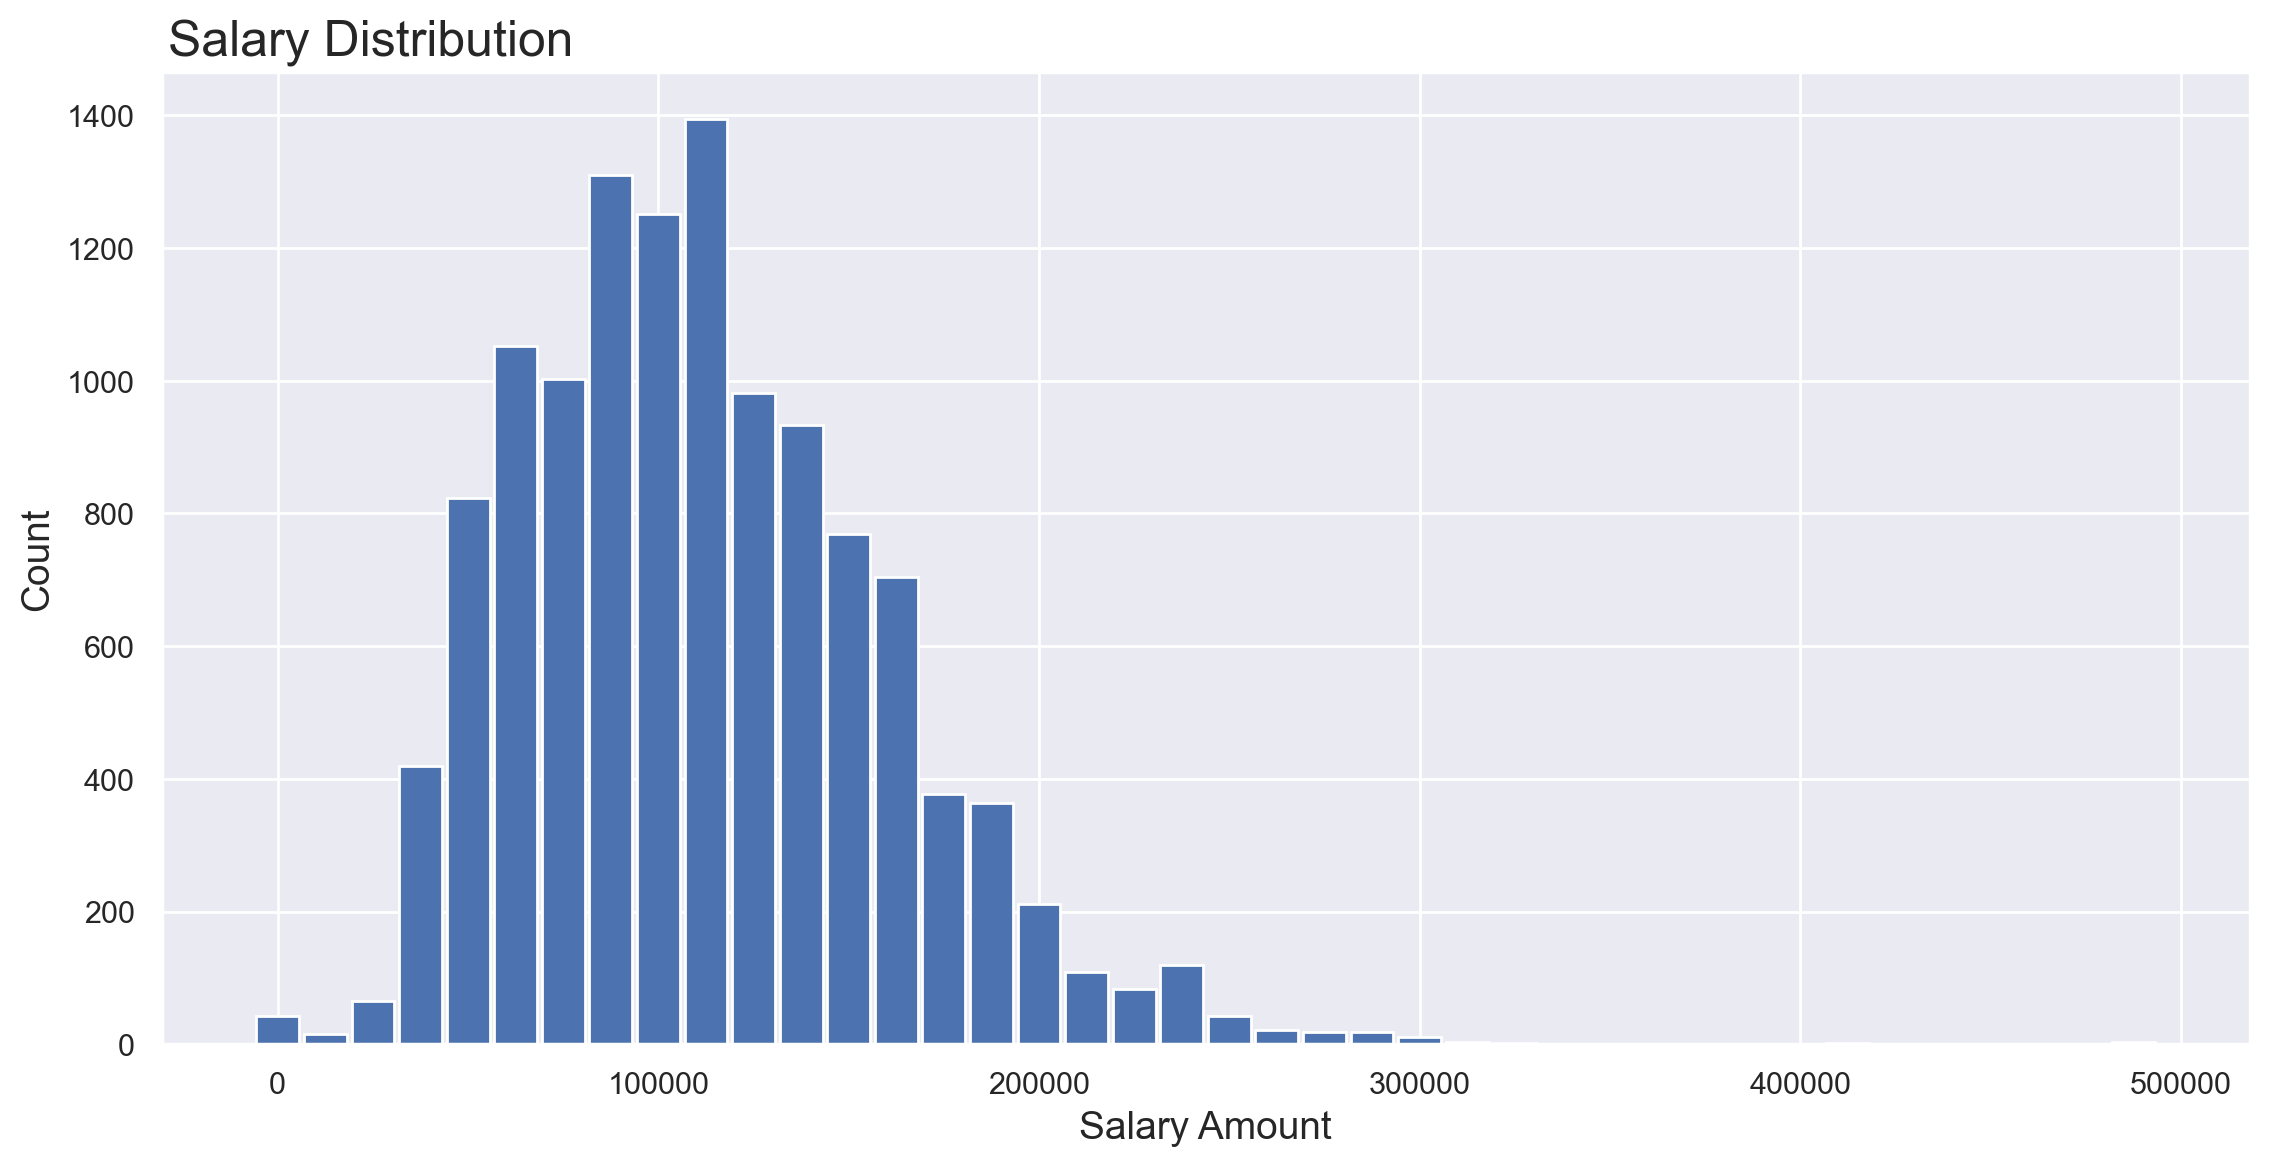

In [122]:
plt.figure(figsize=(12,6))
plt.hist(df.salary_amount, bins= 40, align='left', rwidth=0.9)
plt.title('Salary Distribution', x = 0.1, fontsize = 18)
plt.xlabel('Salary Amount', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

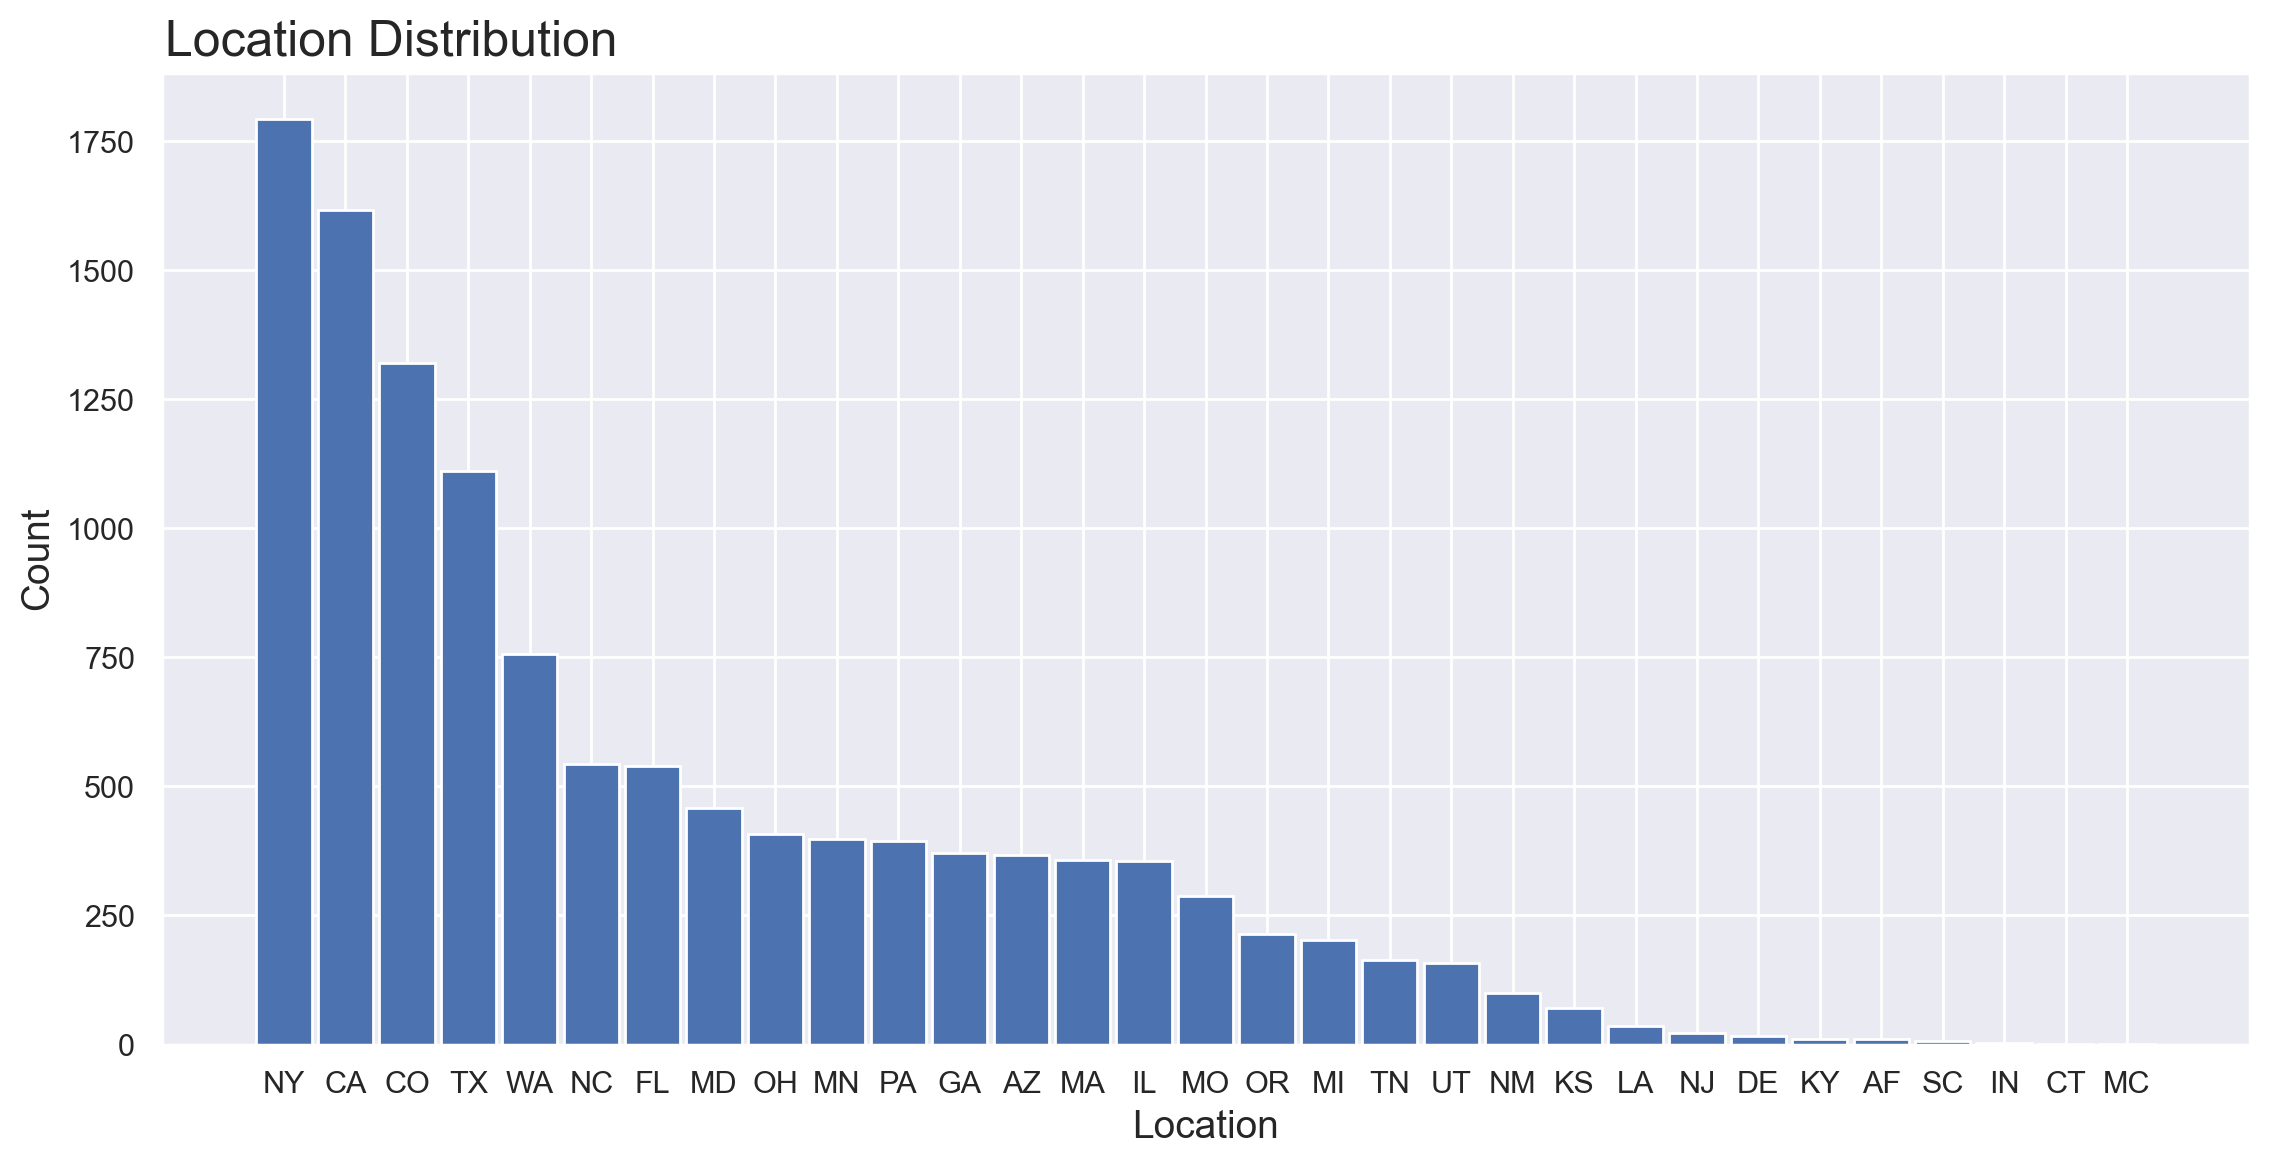

In [137]:
locs = df.company_location.value_counts().index
locs_counts = df.company_location.value_counts().values

plt.figure(figsize=(12,6))
plt.bar(locs, locs_counts, width=0.9)
plt.title('Location Distribution', x = 0.11, fontsize = 18)
plt.xlabel('Location', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median).

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choose the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries.

In [74]:
median = df.salary_amount.median()
print(median)

114252.25


In [75]:
def high_salary(row):
    median = df.salary_amount.median()
    if row['salary_amount'] >= median:
        return 1
    else:
        return 0

In [76]:
# Creating the new column and applying the function
df['high_salary'] = df.apply(lambda row: high_salary(row), axis=1)

In [77]:
df

,job_title,company_location,salary_amount,high_salary
0,"Senior Software Engineer, Backend (Speech to T...",NM,190000.0,1
1,Senior / Staff NLP Engineer (Speech to Text St...,NM,210000.0,1
2,Senior Data Engineer,NM,175000.0,1
3,Principal Data Engineer (Pre-IPO),NM,175000.0,1
4,Senior Machine Learning Engineer,NM,175000.0,1
...,...,...,...,...
12153,"Sr. Product Manager, Talent & Culture Portfolio",PA,118680.0,1
12154,Distinguished Solution Train Engineer (US),NJ,172380.0,1
12155,Construction Projects Manager I,PA,55739.0,0
12156,School Nurse - Camden,NJ,71500.0,0


#### Thought experiment: What is the baseline accuracy for this model?

Using the median as the splitting point means that the accuracy should be perfectly 0.5

In [78]:
df.high_salary.value_counts(normalize=True).max()

0.5

### Create a classification model to predict High/Low salary. 


- Start by ONLY using the location as a feature.
- Use at least two different classifiers you find suitable.
- Remember that scaling your features might be necessary.
- Display the coefficients/feature importances and write a short summary of what they mean.
- Create a few new variables in your dataframe to represent interesting features of a job title (e.g. whether 'Senior' or 'Manager' is in the title).
- Incorporate other text features from the title or summary that you believe will predict the salary.
- Then build new classification models including also those features. Do they add any value?
- Tune your models by testing parameter ranges, regularization strengths, etc. Discuss how that affects your models.
- Discuss model coefficients or feature importances as applicable.

In [524]:
# Saving the modified dataframe as CSV
df.to_csv('datasets/df.csv', encoding='utf-8', index=False)

In [142]:
# Loading the data from CSV for consistency reasons
df = pd.read_csv('datasets/df.csv')

In [147]:
# Using only location as feature
df_dum = pd.get_dummies(df, columns=['company_location'], drop_first=True)
df_dum.drop(columns=['job_title', 'salary_amount'], inplace=True)
df_dum.head()

,high_salary,company_location_AZ,company_location_CA,company_location_CO,company_location_CT,company_location_DE,company_location_FL,company_location_GA,company_location_IL,company_location_IN,...,company_location_NM,company_location_NY,company_location_OH,company_location_OR,company_location_PA,company_location_SC,company_location_TN,company_location_TX,company_location_UT,company_location_WA
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [209]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [149]:
# Choosing target and predictor variables
y = df_dum.pop('high_salary')
X = df_dum

In [150]:
# Creating train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [151]:
scaler = StandardScaler()

# Rescaling variables
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Logistic Regression

In [219]:
# Instantiating the model 
logreg = LogisticRegression(solver='saga', multi_class='auto', max_iter=1000)

# Fitting the model
logreg.fit(X_train, y_train)

# Calculating scores
logreg_train = logreg.score(X_train, y_train)
logreg_test = logreg.score(X_test, y_test)
logreg_cv = (cross_val_score(logreg, X_train, y_train, cv = 10)).mean()

# Collecting the scores in a dataframe to compare different models later
logreg_df = pd.DataFrame([logreg_train, logreg_test, logreg_cv], index = ['train', 'test', 'cv'], columns=['Logistic Reg'])

print('Logistic Regression Scores: \n')
print('train score: ', logreg_train)
print('test score: ', logreg_test)
print('CV score: ', logreg_cv)

Logistic Regression Scores: 

train score:  0.5728973884433477
test score:  0.5641447368421053
CV score:  0.5685822770355144


Feature Importance & Model Coefficients

In [220]:
# Collecting the model coefficients in a dataframe
lr_coef = pd.DataFrame(logreg.coef_[0], index=X_train.columns, columns=['coefficients'])
lr_coef.sort_values(by = 'coefficients', ascending = False)[:10]

,coefficients
company_location_CA,0.115076
company_location_NY,0.106904
company_location_DE,0.019520
company_location_GA,-0.000570
company_location_MA,-0.004725
company_location_IL,-0.004872
company_location_MD,-0.010070
company_location_KS,-0.010530
company_location_NM,-0.014796
company_location_TN,-0.022901


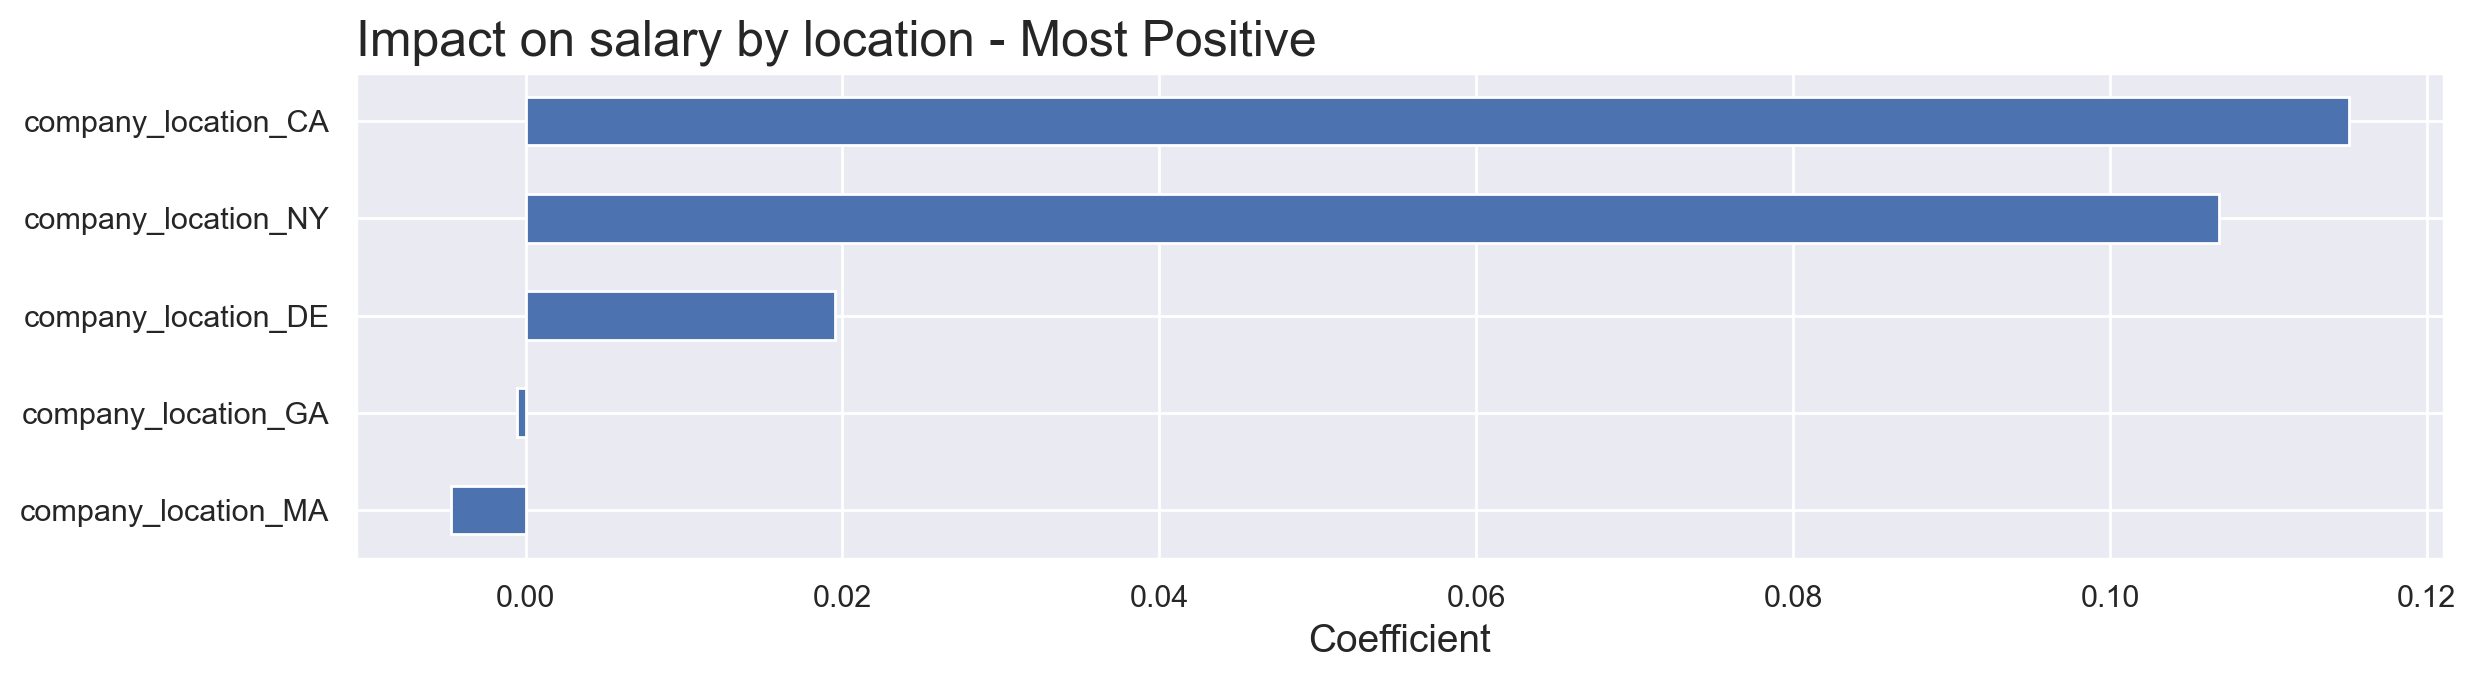

In [221]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on salary by location - Most Positive', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

lr_coef['coefficients'].sort_values(ascending = True).tail(5).plot(kind='barh');

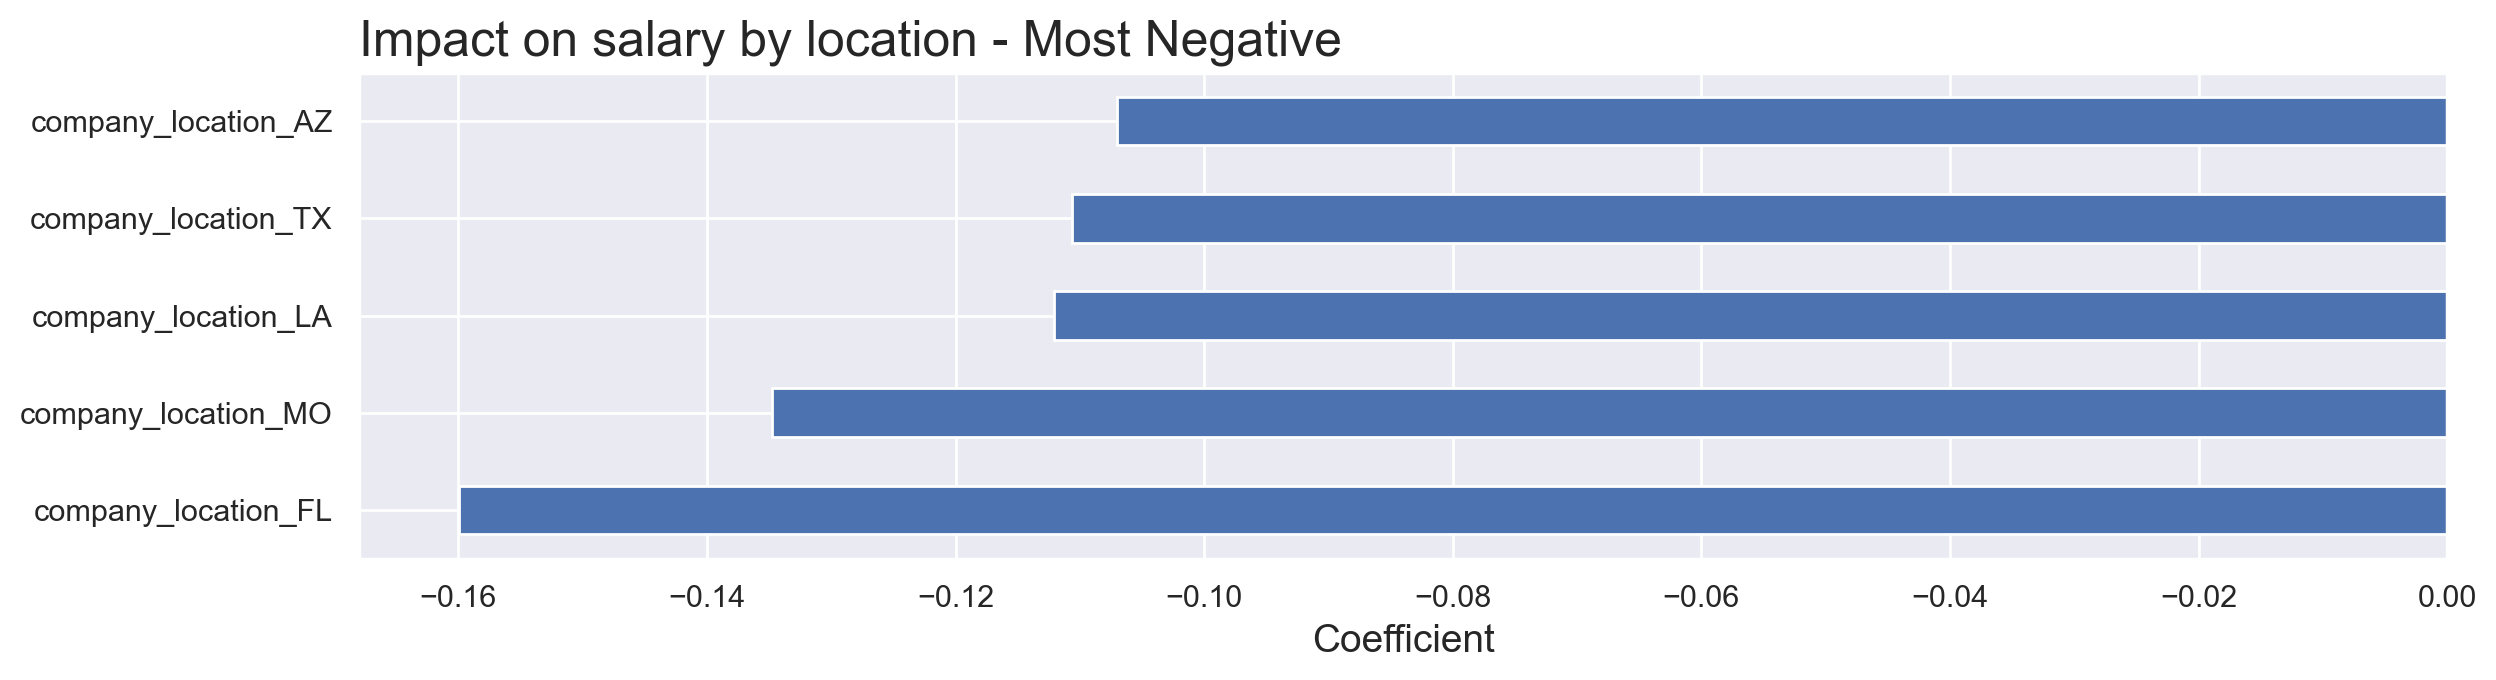

In [222]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on salary by location - Most Negative', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

lr_coef['coefficients'].sort_values(ascending = True).head(5).plot(kind='barh');

Logistic Regression coeffients describe the size and the direction of the relationship between a predictor and the target variable.  
In this model, a job located in the states of **California**, **New York** and **Delaware** has a large influence on having a high paying salary since their coefficients are positive and relatively large.  
On the other side, job openings located in **Florida**, **Missouri** and **Louisiana** have negative and relatively large coefficients, so in those locations the salary would likely be well below median.
<br/><br/>

Classification Report

In [223]:
predictions = logreg.predict(X_test)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55      1216
           1       0.56      0.60      0.58      1216

    accuracy                           0.56      2432
   macro avg       0.56      0.56      0.56      2432
weighted avg       0.56      0.56      0.56      2432



Confusion Matrix

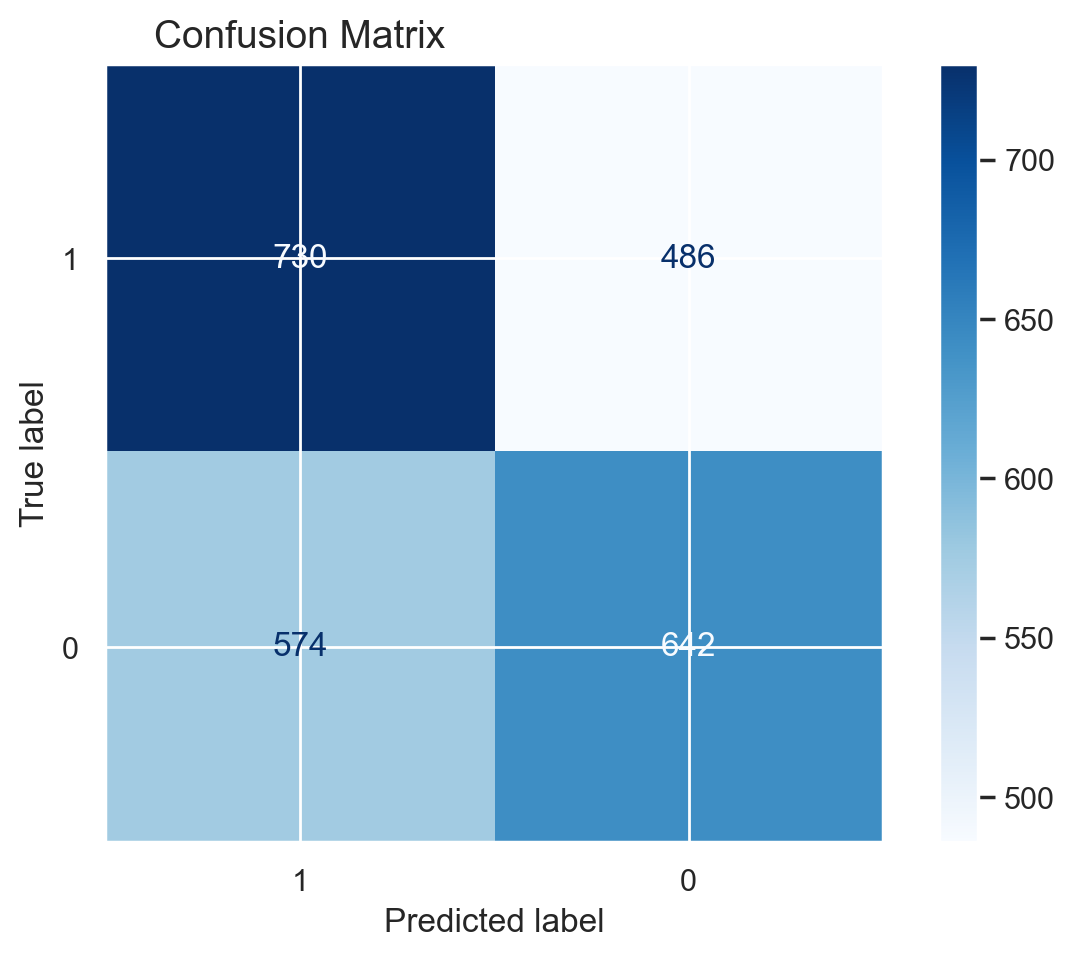

In [224]:
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', labels=[1, 0])
plt.title('Confusion Matrix', x = 0.25, fontsize = 14)
plt.show()

ROC-AUC Curve

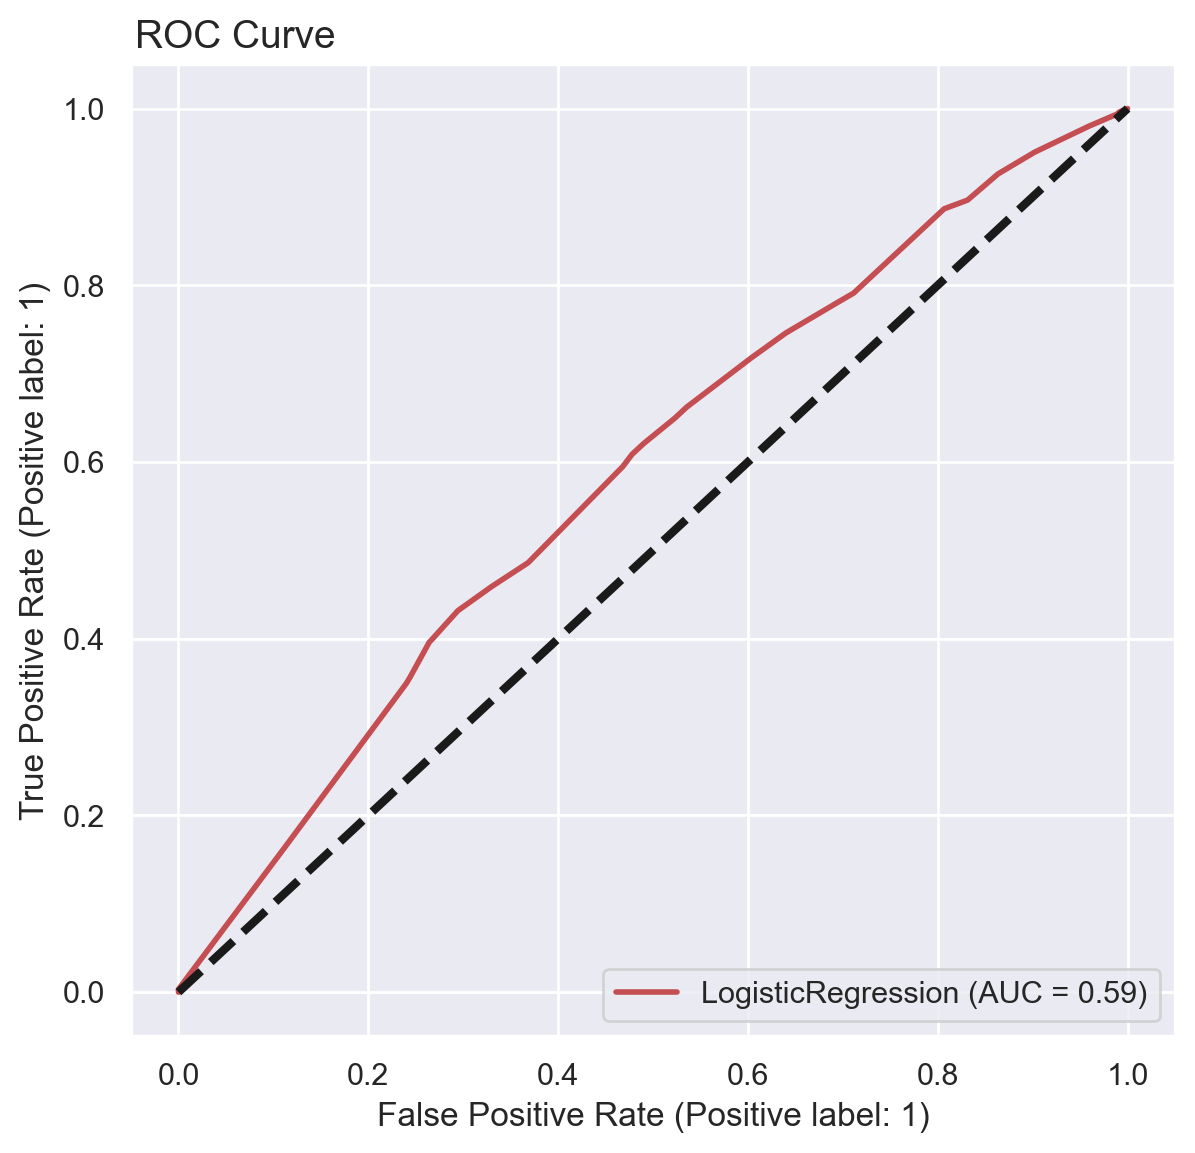

In [225]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(logreg, X_test, y_test, c='r', lw=2, ax=ax)
plt.title('ROC Curve', x = 0.1, fontsize = 14)
ax.plot([0, 1], [0, 1], 'k--', lw=3)
plt.show()

In [226]:
print('ROC-AUC Score:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

ROC-AUC Score: 0.5855269920792936


The f1-score is balanced between the two classes, however the accuracy of the model is pretty low.  
The area under the curve is **0.59**, which tells us that this model has a bad class separation capacity.  
<br/><br/>

#### Decision Tree with Grid Search CV

In [246]:
# define gridsearch parameters
dtree_params = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
    'ccp_alpha': [0, 0.001, 0.005, 0.01]}


# define the model
dtree = DecisionTreeClassifier(random_state = 1)

# instantiate the gridsearch
dtc_gs = GridSearchCV(dtree, dtree_params, cv=5, n_jobs=10, verbose=1)

# find the fit in the gridsearch
dtc_gs.fit(X_train, y_train)

# pull out the model with the best parameters found in the gridsearch
dt_best = dtc_gs.best_estimator_

# calculate scores
dt_train = dt_best.score(X_train, y_train)
dt_test = dt_best.score(X_test, y_test)
dt_cv = (cross_val_score(dt_best, X_train, y_train, cv = 10)).mean()

# collect the scores in a dataframe to compare different models later
dt_df = pd.DataFrame([dt_train, dt_test, dt_cv], index = ['train', 'test', 'cv'], columns = ['Decision Tree'])

print('Decision Tree Classifier Scores: \n')
print('train score: ', dt_train)
print('test score: ', dt_test)
print('CV score: ', dt_cv)

Fitting 5 folds for each of 1936 candidates, totalling 9680 fits
Decision Tree Classifier Scores: 

train score:  0.5728973884433477
test score:  0.5633223684210527
CV score:  0.5691990323085447


Feature Importance & Model Coefficients

In [247]:
# Collecting the model coefficients in a dataframe
dt_coef = pd.DataFrame(dt_best.feature_importances_, columns=['importance'], index=X.columns)
dt_coef.sort_values(by = 'importance', ascending = False)[:10]

,importance
company_location_NY,0.351696
company_location_CA,0.264177
company_location_FL,0.074481
company_location_MO,0.063648
company_location_LA,0.042600
company_location_AZ,0.033127
company_location_CO,0.023695
company_location_MA,0.021270
company_location_IL,0.018555
company_location_GA,0.018213


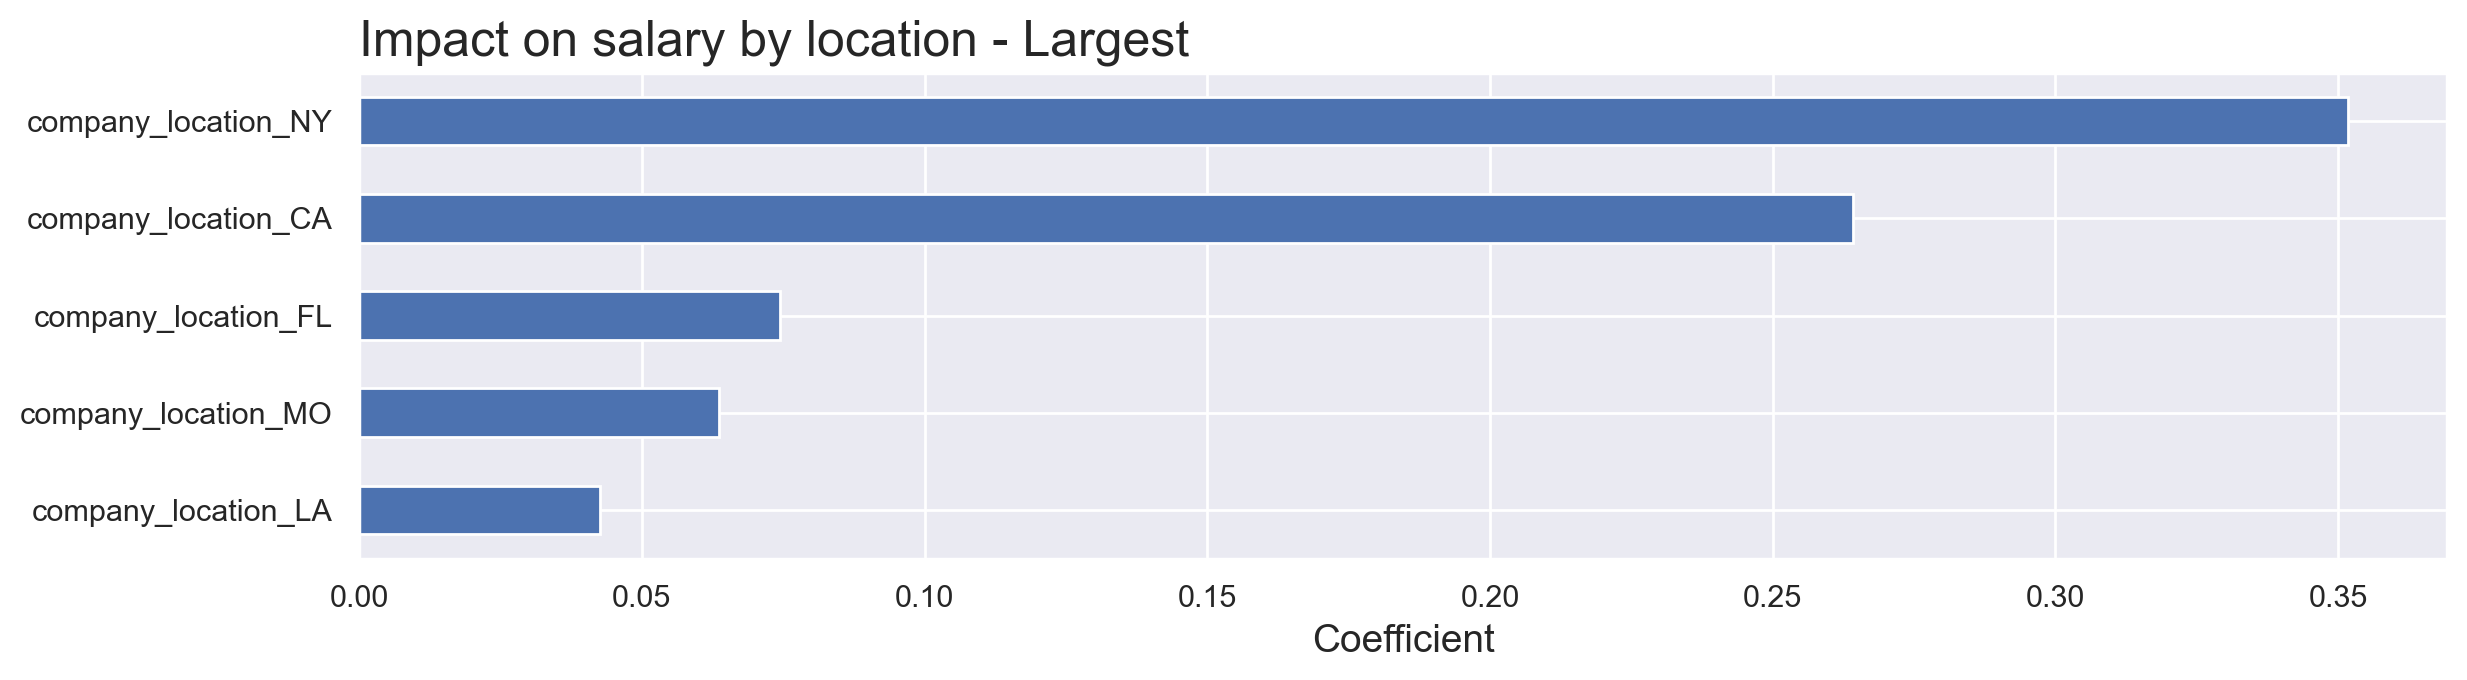

In [248]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on salary by location - Largest', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

dt_coef['importance'].sort_values(ascending = True).tail(5).plot(kind='barh');

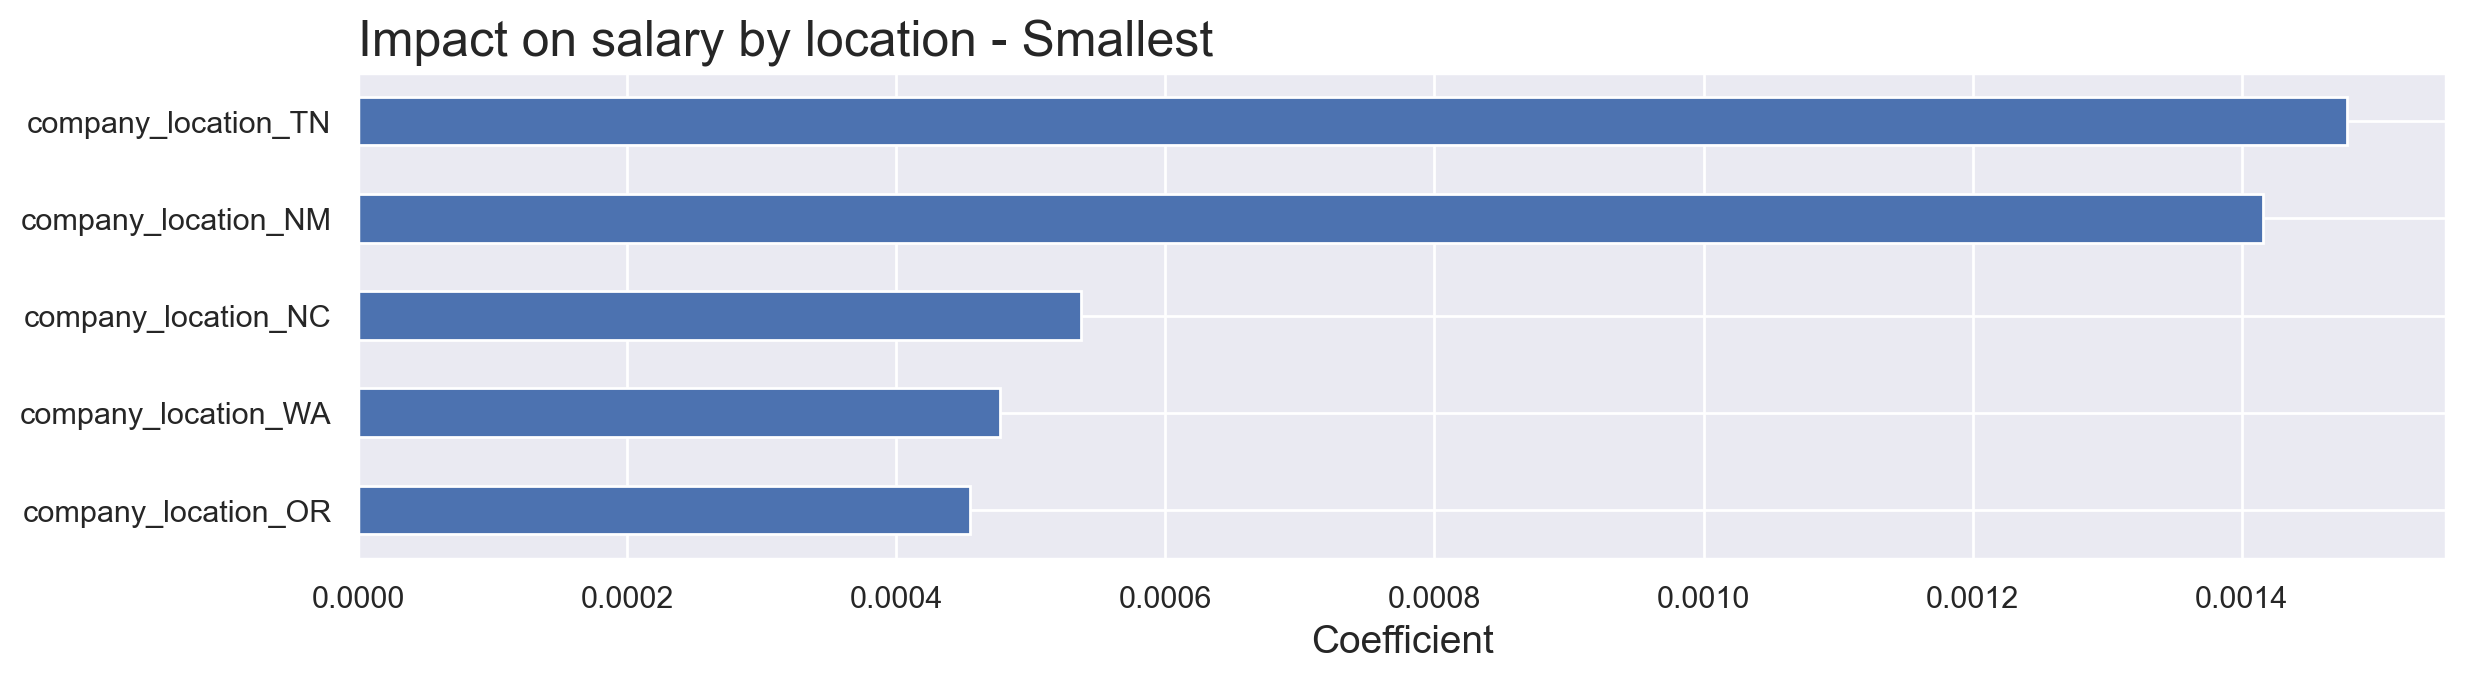

In [249]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on salary by location - Smallest', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

dt_coef['importance'].sort_values(ascending = True).head(5).plot(kind='barh');

Feature importance in Decision Tree is based on node impurity and describes the size of the relationship between a predictor and the target variable.  
In this model, the states of **New York**, **California** and **Florida** have the highest values, indicating that these locations have the largest impact on salaries.  
On the other side, **Oregon**, **Washington** and **North Carolina** have the smallest impact on salaries.
<br/><br/>

Classification Report

In [250]:
predictions = dt_best.predict(X_test)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55      1216
           1       0.56      0.59      0.58      1216

    accuracy                           0.56      2432
   macro avg       0.56      0.56      0.56      2432
weighted avg       0.56      0.56      0.56      2432



Confusion Matrix

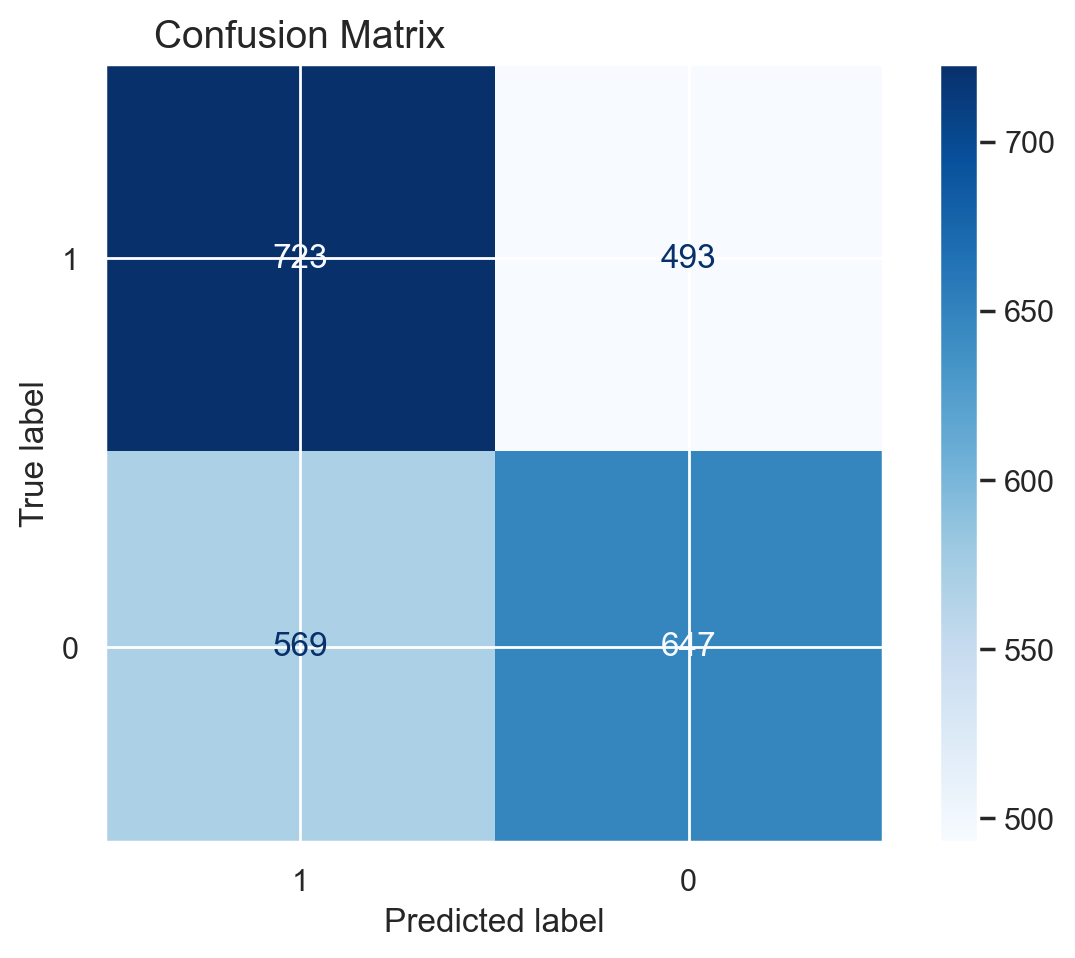

In [251]:
plot_confusion_matrix(dt_best, X_test, y_test, cmap='Blues', labels=[1, 0])
plt.title('Confusion Matrix', x = 0.25, fontsize = 14)
plt.show()

ROC-AUC Curve

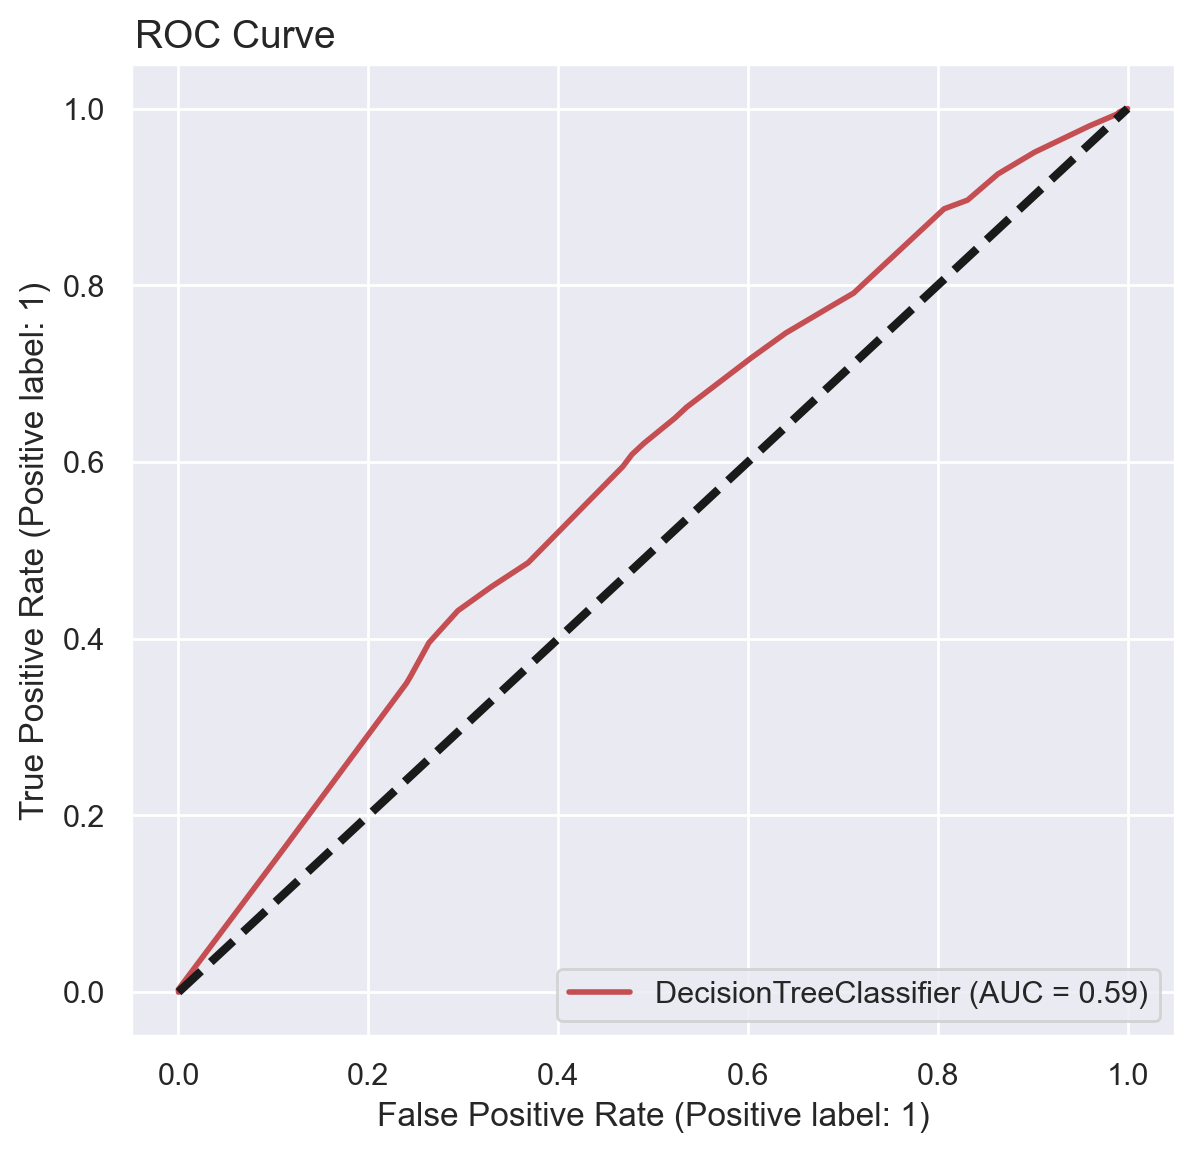

In [252]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(dt_best, X_test, y_test, c='r', lw=2, ax=ax)
plt.title('ROC Curve', x = 0.1, fontsize = 14)
ax.plot([0, 1], [0, 1], 'k--', lw=3)
plt.show()

In [253]:
print('ROC-AUC Score:', roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1]))

ROC-AUC Score: 0.5855269920792936


The f1-score is balanced between the two classes, however the accuracy of the model is pretty low.  
The area under the curve is **0.59**, which tells us that this model has a bad class separation capacity.  
<br/><br/>

#### Random Forest with Grid Search CV

In [255]:
# define gridsearch parameters
randf_params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 5, 7]}

# define the model
randf = RandomForestClassifier(random_state = 1)

# instantiate the gridsearch
rfc_gs = GridSearchCV(randf, randf_params, cv=5, n_jobs=10, verbose=1)

# find the fit in the gridsearch
rfc_gs.fit(X_train, y_train)

# pull out the model with the best parameters found in the gridsearch
rf_best = rfc_gs.best_estimator_

# calculate scores
rf_train = rf_best.score(X_train, y_train)
rf_test = rf_best.score(X_test, y_test)
rf_cv = (cross_val_score(rf_best, X_train, y_train, cv = 10)).mean()

# collect the scores in a dataframe to compare different models later
rf_df = pd.DataFrame([rf_train, rf_test, rf_cv], index = ['train', 'test', 'cv'], columns = ['Random Forest'])

print('Random Forest Classifier Scores: \n')
print('train score: ', rf_train)
print('test score: ', rf_test)
print('CV score: ', rf_cv)

Fitting 5 folds for each of 1650 candidates, totalling 8250 fits
Random Forest Classifier Scores: 

train score:  0.5728973884433477
test score:  0.5633223684210527
CV score:  0.5689933767271897


Feature Importance & Model Coefficients 

In [261]:
# Collecting the model coefficients in a dataframe
rf_coef = pd.DataFrame(rf_best.feature_importances_, columns=['importance'], index=X.columns)
rf_coef.sort_values(by = 'importance', ascending = False)[:10]

,importance
company_location_CA,0.289069
company_location_NY,0.285580
company_location_FL,0.068224
company_location_MO,0.055472
company_location_LA,0.037886
company_location_CO,0.033384
company_location_AZ,0.027120
company_location_GA,0.021127
company_location_MD,0.019171
company_location_IL,0.017197


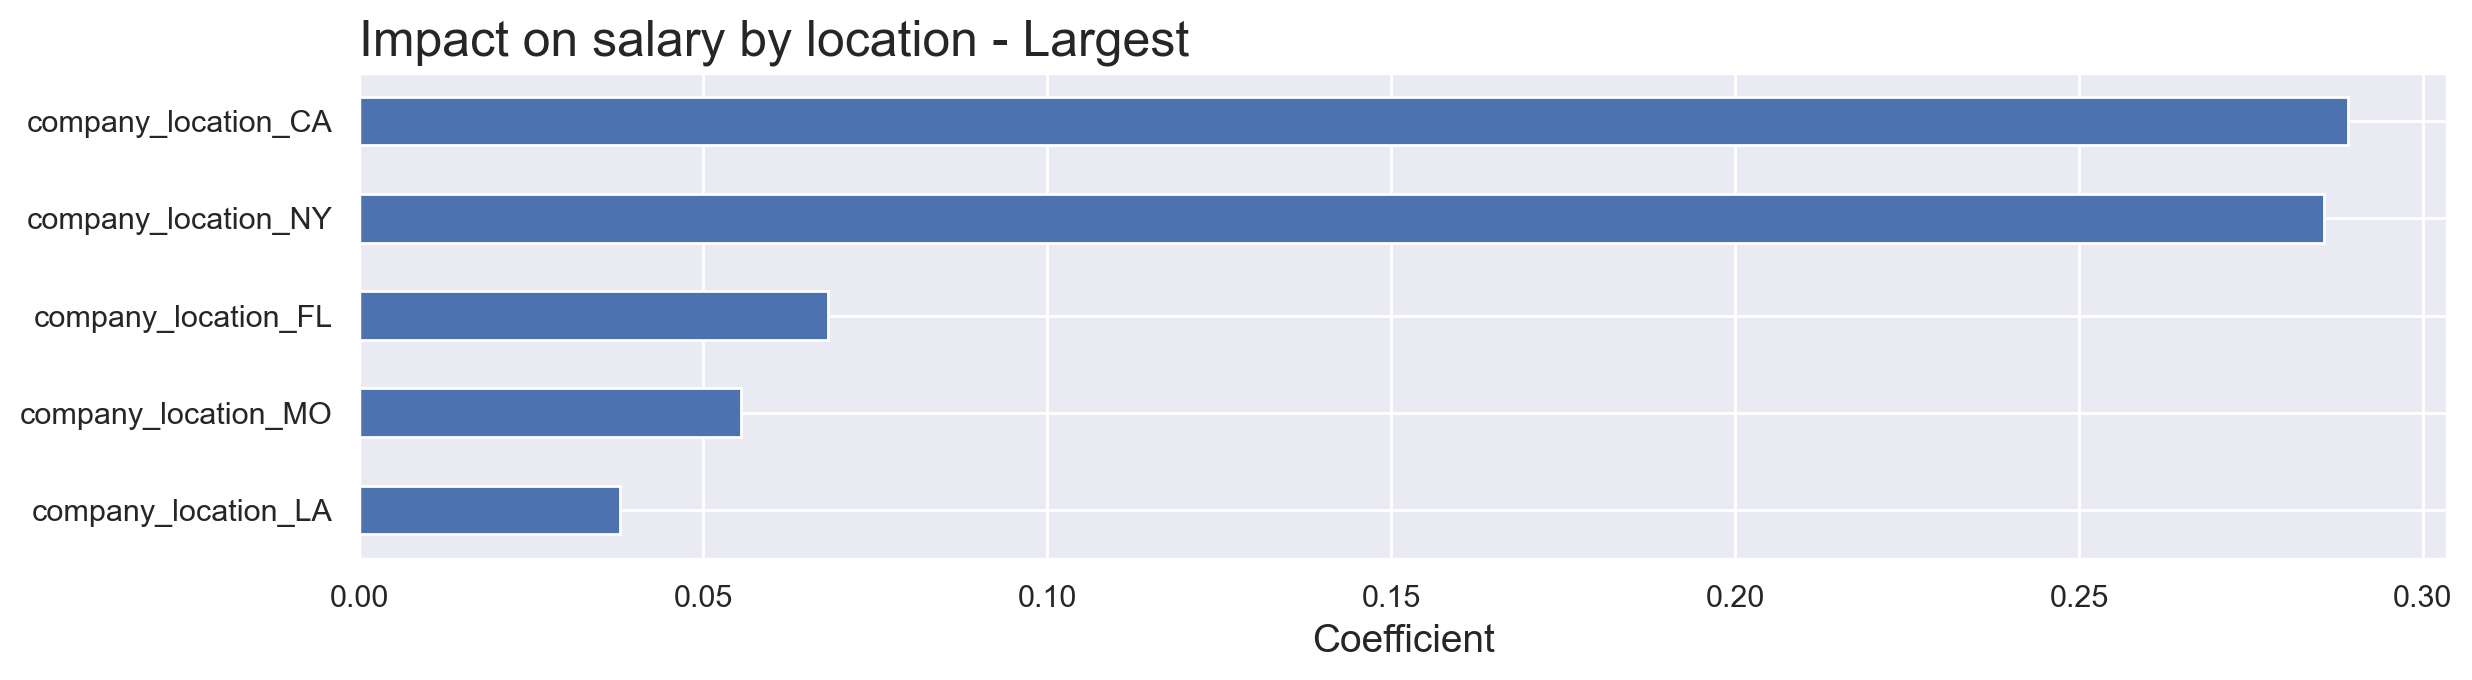

In [262]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on salary by location - Largest', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

rf_coef['importance'].sort_values(ascending = True).tail(5).plot(kind='barh');

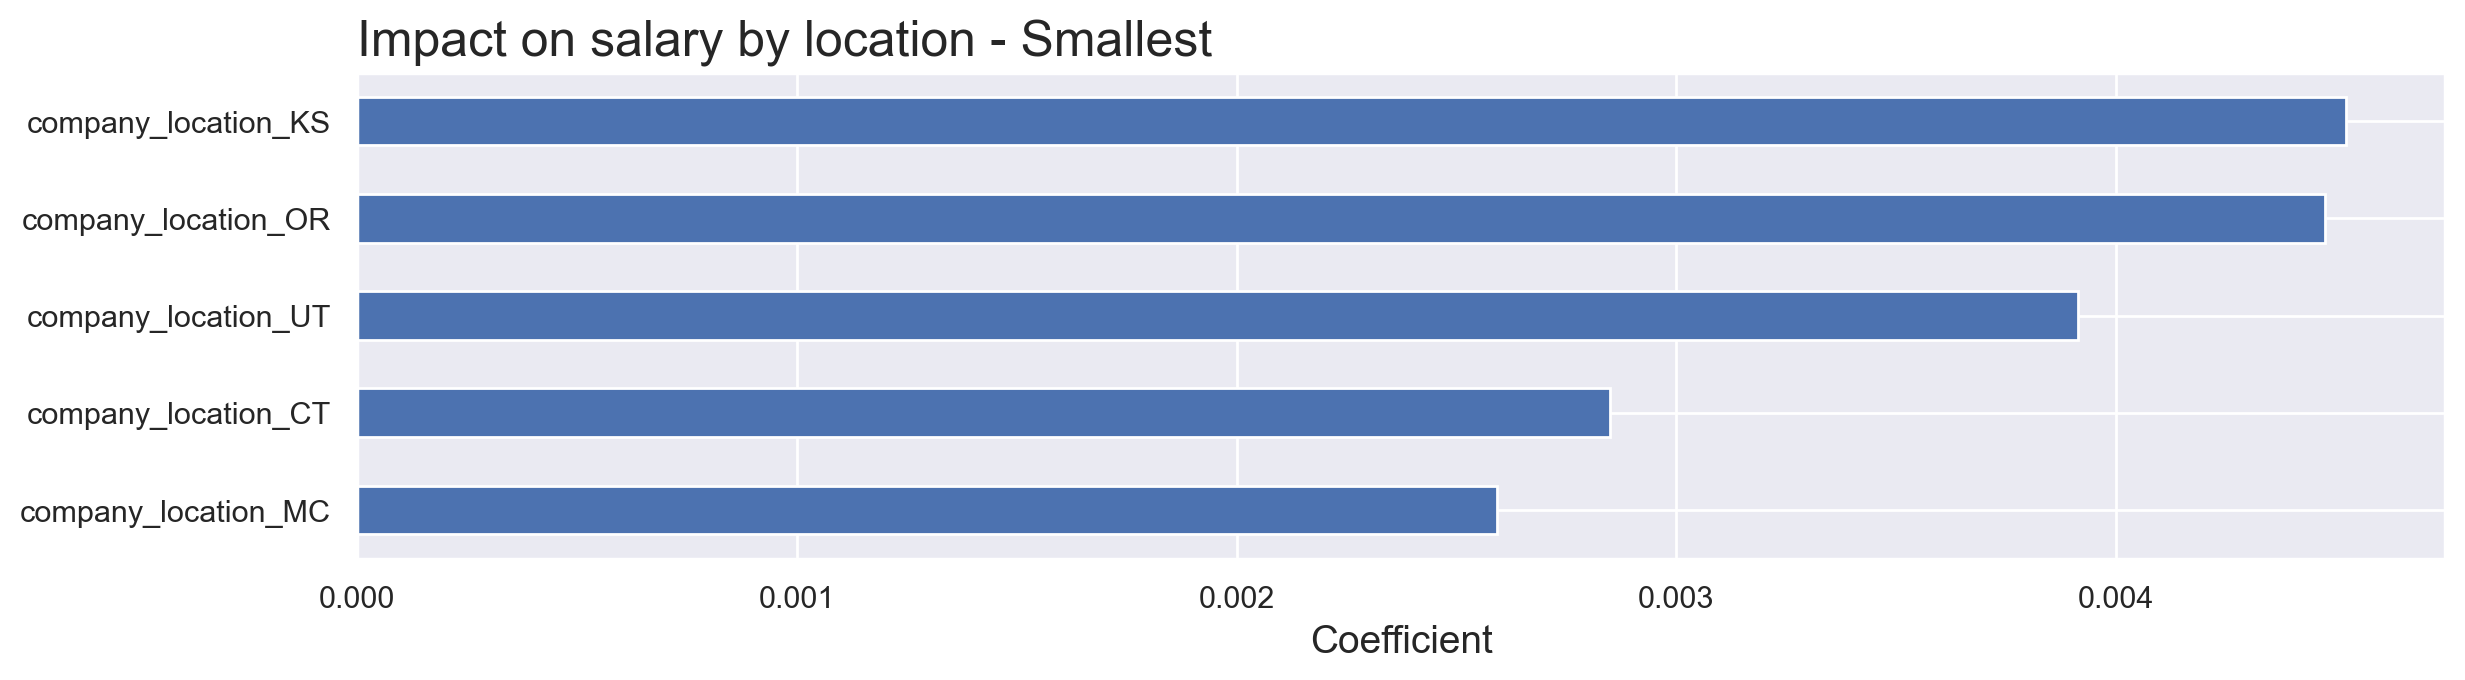

In [263]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on salary by location - Smallest', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

rf_coef['importance'].sort_values(ascending = True).head(5).plot(kind='barh');

Feature importance in Random Forest is based on node impurity and describes the size of the relationship between a predictor and the target variable.  
In this model, the states of **California**, **New York** and **Florida** have the highest values, indicating that these locations have the largest impact on salaries.  
On the other side, **Massachusetts**, **Connecticut** and **Utah** have the smallest impact on salaries.
<br/><br/>

Classification Report

In [264]:
predictions = rf_best.predict(X_test)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.53      0.55      1216
           1       0.56      0.59      0.58      1216

    accuracy                           0.56      2432
   macro avg       0.56      0.56      0.56      2432
weighted avg       0.56      0.56      0.56      2432



Confusion Matrix

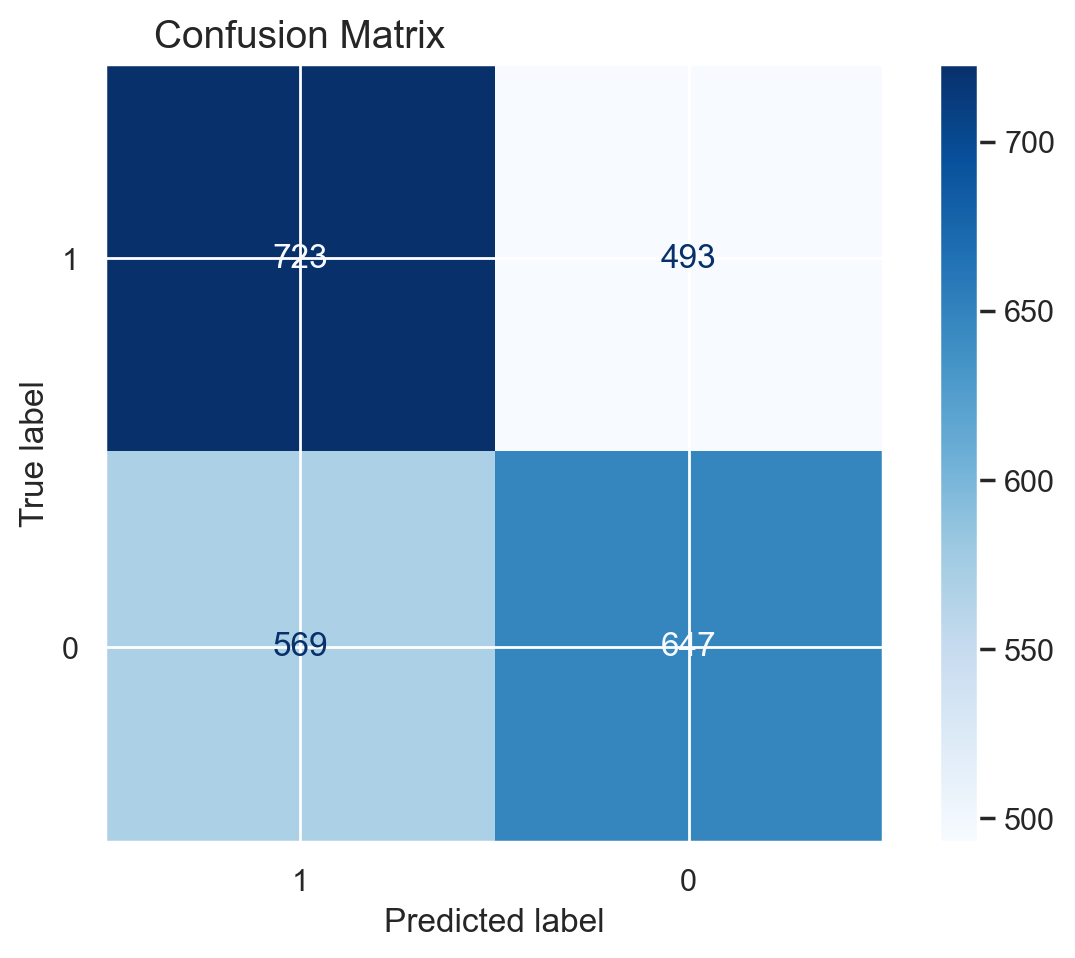

In [265]:
plot_confusion_matrix(rf_best, X_test, y_test, cmap='Blues', labels=[1, 0])
plt.title('Confusion Matrix', x = 0.25, fontsize = 14)
plt.show()

ROC-AUC Curve

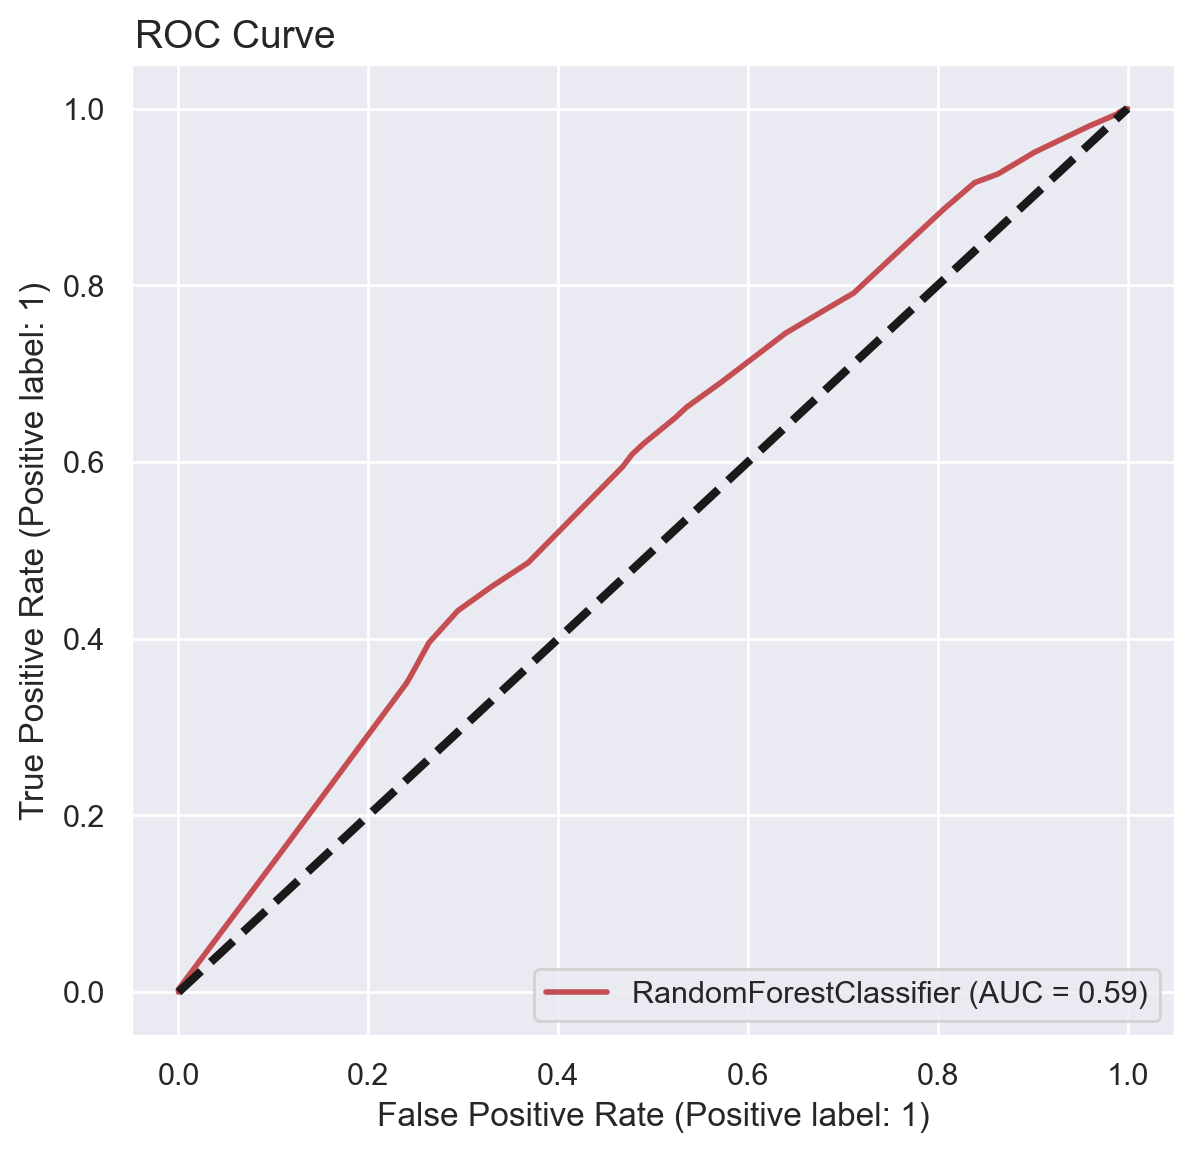

In [266]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(rf_best, X_test, y_test, c='r', lw=2, ax=ax)
plt.title('ROC Curve', x = 0.1, fontsize = 14)
ax.plot([0, 1], [0, 1], 'k--', lw=3)
plt.show()

In [267]:
print('ROC-AUC Score:', roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1]))

ROC-AUC Score: 0.5855269920792936


The f1-score is balanced between the two classes, however the accuracy of the model is pretty low.  
The area under the curve is **0.59**, which tells us that this model has a bad class separation capacity.  
<br/><br/>

#### Model Scores Evaluation

In [269]:
models_1 = pd.concat([logreg_df, dt_df, rf_df], axis = 1)
models_1

,Logistic Reg,Decision Tree,Random Forest
train,0.572897,0.572897,0.572897
test,0.564145,0.563322,0.563322
cv,0.568582,0.569199,0.568993


In the three models implemented above, **Decision Tree** achieved the highest CV score of **0.5691**  

The most important features for this model were **New York**, **California** and **Florida**. According to the Decision Tree Classifier, these locations have the biggest impact in predicting job salaries.

Although the Decison Tree Classifer performed the best, all the three model scores were quite close to one another, and were about 0.06 higher than the baseline of 0.5 indicating that the models made better predictions. However, it is likely that by adding other features these scores can improve.  
<br/><br/>

#### Adding additional features based on job title

In [270]:
def title_senior(row):
    if 'Senior' in row['job_title']:
        return 1
    elif 'senior' in row['job_title']:
        return 1
    elif 'Sr.' in row['job_title']:
        return 1
    elif 'sr.' in row['job_title']:
        return 1
    else:
        return 0

In [271]:
def title_junior(row):
    if 'Junior' in row['job_title']:
        return 1
    elif 'junior' in row['job_title']:
        return 1
    elif 'Jr.' in row['job_title']:
        return 1
    elif 'jr.' in row['job_title']:
        return 1
    else:
        return 0

In [272]:
def title_manager(row):
    if 'Manager' in row['job_title']:
        return 1
    elif 'manager' in row['job_title']:
        return 1
    else:
        return 0

In [273]:
def title_principal(row):
    if 'Principal' in row['job_title']:
        return 1
    elif 'principal' in row['job_title']:
        return 1
    else:
        return 0

In [274]:
def title_director(row):
    if 'Director' in row['job_title']:
        return 1
    elif 'director' in row['job_title']:
        return 1
    else:
        return 0

In [275]:
def title_lead(row):
    if 'Lead' in row['job_title']:
        return 1
    elif 'lead' in row['job_title']:
        return 1
    elif 'Leader' in row['job_title']:
        return 1
    elif 'leader' in row['job_title']:
        return 1
    else:
        return 0

In [276]:
def title_associate(row):
    if 'Associate' in row['job_title']:
        return 1
    elif 'associate' in row['job_title']:
        return 1
    else:
        return 0

In [277]:
def title_engineer(row):
    if 'Engineer' in row['job_title']:
        return 1
    elif 'engineer' in row['job_title']:
        return 1
    else:
        return 0

In [278]:
def title_scientist(row):
    if 'Scientist' in row['job_title']:
        return 1
    elif 'scientist' in row['job_title']:
        return 1
    else:
        return 0

In [279]:
def title_specialist(row):
    if 'Specialist' in row['job_title']:
        return 1
    elif 'specialist' in row['job_title']:
        return 1
    else:
        return 0

In [280]:
def title_researcher(row):
    if 'Researcher' in row['job_title']:
        return 1
    elif 'researcher' in row['job_title']:
        return 1
    else:
        return 0

In [281]:
def title_consultant(row):
    if 'Consultant' in row['job_title']:
        return 1
    elif 'consultant' in row['job_title']:
        return 1
    else:
        return 0

In [282]:
def title_analyst(row):
    if 'Analyst' in row['job_title']:
        return 1
    elif 'analyst' in row['job_title']:
        return 1
    else:
        return 0

In [283]:
def title_architect(row):
    if 'Architect' in row['job_title']:
        return 1
    elif 'architect' in row['job_title']:
        return 1
    else:
        return 0

In [284]:
def title_postdoc(row):
    if 'Postdoc' in row['job_title']:
        return 1
    elif 'postdoc' in row['job_title']:
        return 1
    elif 'Post-doc' in row['job_title']:
        return 1
    elif 'post-doc' in row['job_title']:
        return 1
    elif 'Postdoctoral' in row['job_title']:
        return 1
    elif 'Post Doctoral' in row['job_title']:
        return 1
    else:
        return 0

In [285]:
def title_coordinator(row):
    if 'Coordinator' in row['job_title']:
        return 1
    elif 'coordinator' in row['job_title']:
        return 1
    elif 'Co-ordinator' in row['job_title']:
        return 1
    elif 'co-ordinator' in row['job_title']:
        return 1
    else:
        return 0

In [286]:
def title_supervisor(row):
    if 'Supervisor' in row['job_title']:
        return 1
    elif 'supervisor' in row['job_title']:
        return 1
    else:
        return 0

In [287]:
def title_president(row):
    if 'President' in row['job_title']:
        return 1
    elif 'president' in row['job_title']:
        return 1
    else:
        return 0

In [288]:
def title_developer(row):
    if 'Developer' in row['job_title']:
        return 1
    elif 'developer' in row['job_title']:
        return 1
    else:
        return 0

In [289]:
def title_designer(row):
    if 'Designer' in row['job_title']:
        return 1
    elif 'designer' in row['job_title']:
        return 1
    else:
        return 0

In [290]:
def title_assistant(row):
    if 'Assistant' in row['job_title']:
        return 1
    elif 'assistant' in row['job_title']:
        return 1
    else:
        return 0

In [291]:
# Creating the new columns and applying the functions
df['title_senior'] = df.apply(lambda row: title_senior(row), axis=1)
df['title_junior'] = df.apply(lambda row: title_junior(row), axis=1)
df['title_manager'] = df.apply(lambda row: title_manager(row), axis=1)
df['title_principal'] = df.apply(lambda row: title_principal(row), axis=1)
df['title_director'] = df.apply(lambda row: title_director(row), axis=1)
df['title_lead'] = df.apply(lambda row: title_lead(row), axis=1)
df['title_associate'] = df.apply(lambda row: title_associate(row), axis=1)
df['title_engineer'] = df.apply(lambda row: title_engineer(row), axis=1)
df['title_scientist'] = df.apply(lambda row: title_scientist(row), axis=1)
df['title_specialist'] = df.apply(lambda row: title_specialist(row), axis=1)
df['title_researcher'] = df.apply(lambda row: title_researcher(row), axis=1)
df['title_consultant'] = df.apply(lambda row: title_consultant(row), axis=1)
df['title_analyst'] = df.apply(lambda row: title_analyst(row), axis=1)
df['title_architect'] = df.apply(lambda row: title_architect(row), axis=1)
df['title_postdoc'] = df.apply(lambda row: title_postdoc(row), axis=1)
df['title_coordinator'] = df.apply(lambda row: title_coordinator(row), axis=1)
df['title_supervisor'] = df.apply(lambda row: title_supervisor(row), axis=1)
df['title_president'] = df.apply(lambda row: title_president(row), axis=1)
df['title_developer'] = df.apply(lambda row: title_developer(row), axis=1)
df['title_designer'] = df.apply(lambda row: title_designer(row), axis=1)
df['title_assistant'] = df.apply(lambda row: title_assistant(row), axis=1)


In [292]:
df_dum = pd.get_dummies(df, columns=['company_location'])
df_dum.drop(columns=['job_title', 'salary_amount'], inplace=True)
df_dum.head()

,high_salary,title_senior,title_junior,title_manager,title_principal,title_director,title_lead,title_associate,title_engineer,title_scientist,...,company_location_NM,company_location_NY,company_location_OH,company_location_OR,company_location_PA,company_location_SC,company_location_TN,company_location_TX,company_location_UT,company_location_WA
0,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [293]:
# Choosing target and predictor variables
y = df_dum.pop('high_salary')
X = df_dum

In [294]:
# Creating train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [295]:
scaler = StandardScaler()

# Rescaling variables
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Logistic Regression

In [297]:
# Instantiating the model 
logreg = LogisticRegression(solver='saga', multi_class='auto', max_iter=1000)

# Fitting the model
logreg.fit(X_train, y_train)

# Calculating scores
new_logreg_train = logreg.score(X_train, y_train)
new_logreg_test = logreg.score(X_test, y_test)
new_logreg_cv = (cross_val_score(logreg, X_train, y_train, cv = 10)).mean()

# Collecting the scores in a dataframe to compare different models later
new_logreg_df = pd.DataFrame([new_logreg_train, new_logreg_test, new_logreg_cv], index = ['train', 'test', 'cv'], columns=['Logistic Reg'])

print('Logistic Regression Scores: \n')
print('train score: ', new_logreg_train)
print('test score: ', new_logreg_test)
print('CV score: ', new_logreg_cv)

Logistic Regression Scores: 

train score:  0.7398725066831174
test score:  0.7425986842105263
CV score:  0.7342123126895308


Feature Importance & Model Coefficients

In [298]:
# Collecting the model coefficients in a dataframe
lr_coef = pd.DataFrame(logreg.coef_[0], index=X_train.columns, columns=['coefficients'])
lr_coef.sort_values(by = 'coefficients', ascending = False)[:10]

,coefficients
title_engineer,0.619047
title_director,0.499633
title_senior,0.435307
title_architect,0.401082
title_president,0.315671
title_lead,0.305980
company_location_NY,0.304121
title_principal,0.279661
company_location_CA,0.224028
title_scientist,0.207105


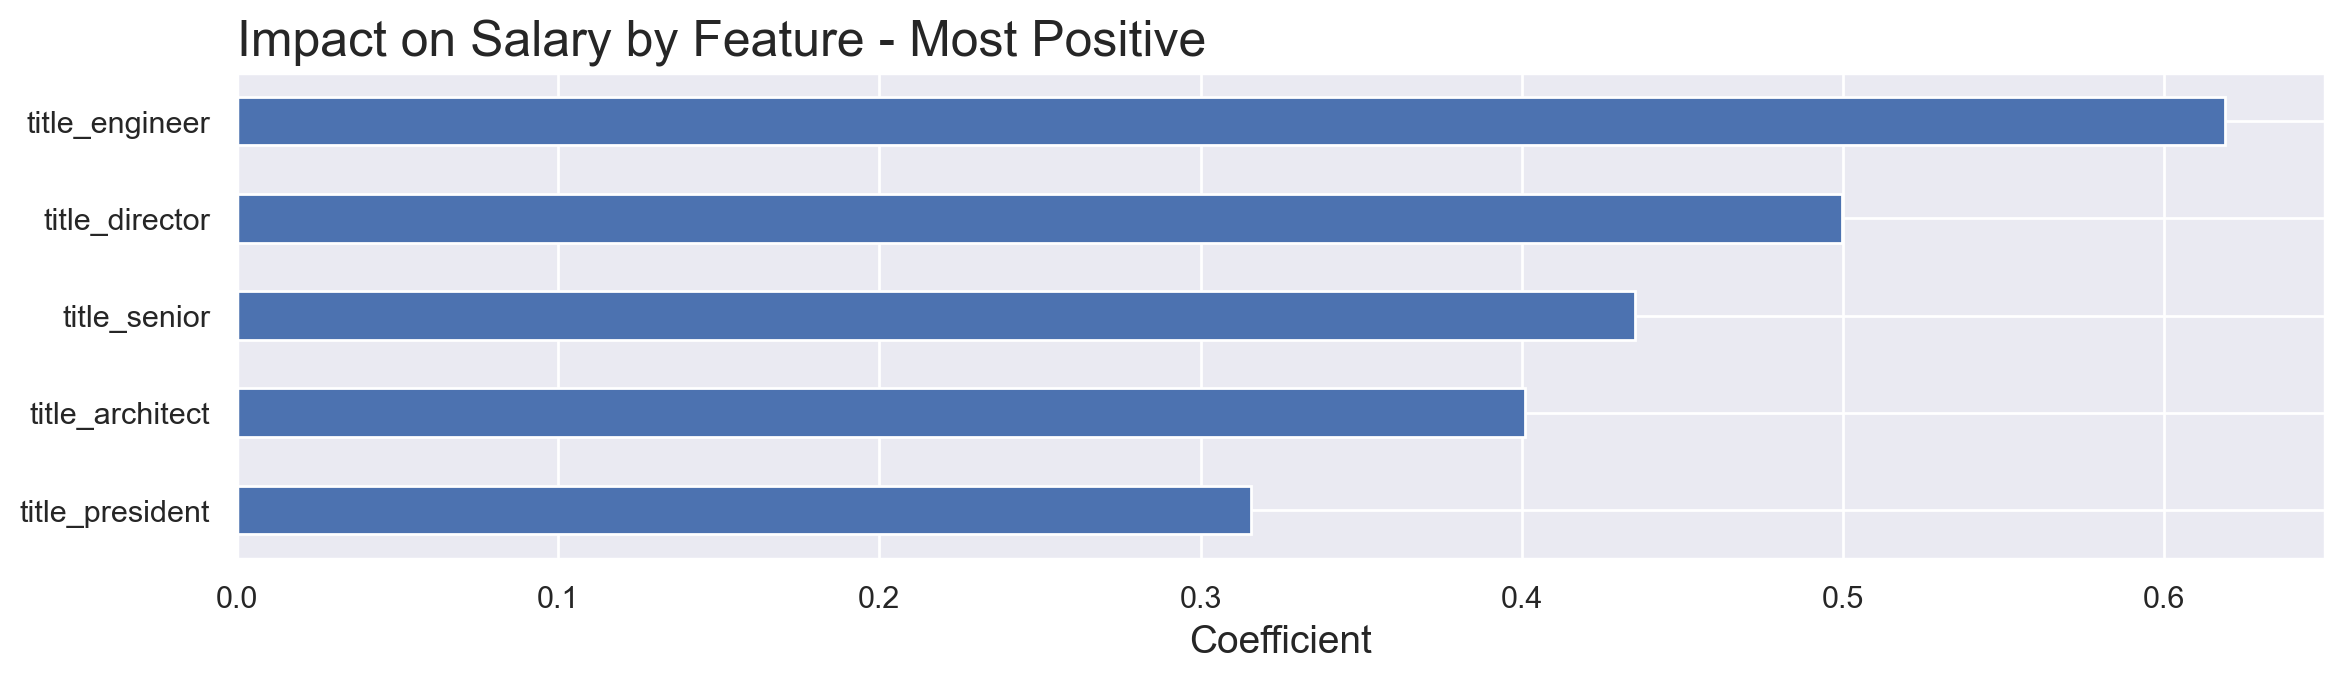

In [301]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on Salary by Feature - Most Positive', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

lr_coef['coefficients'].sort_values(ascending = True).tail(5).plot(kind='barh');

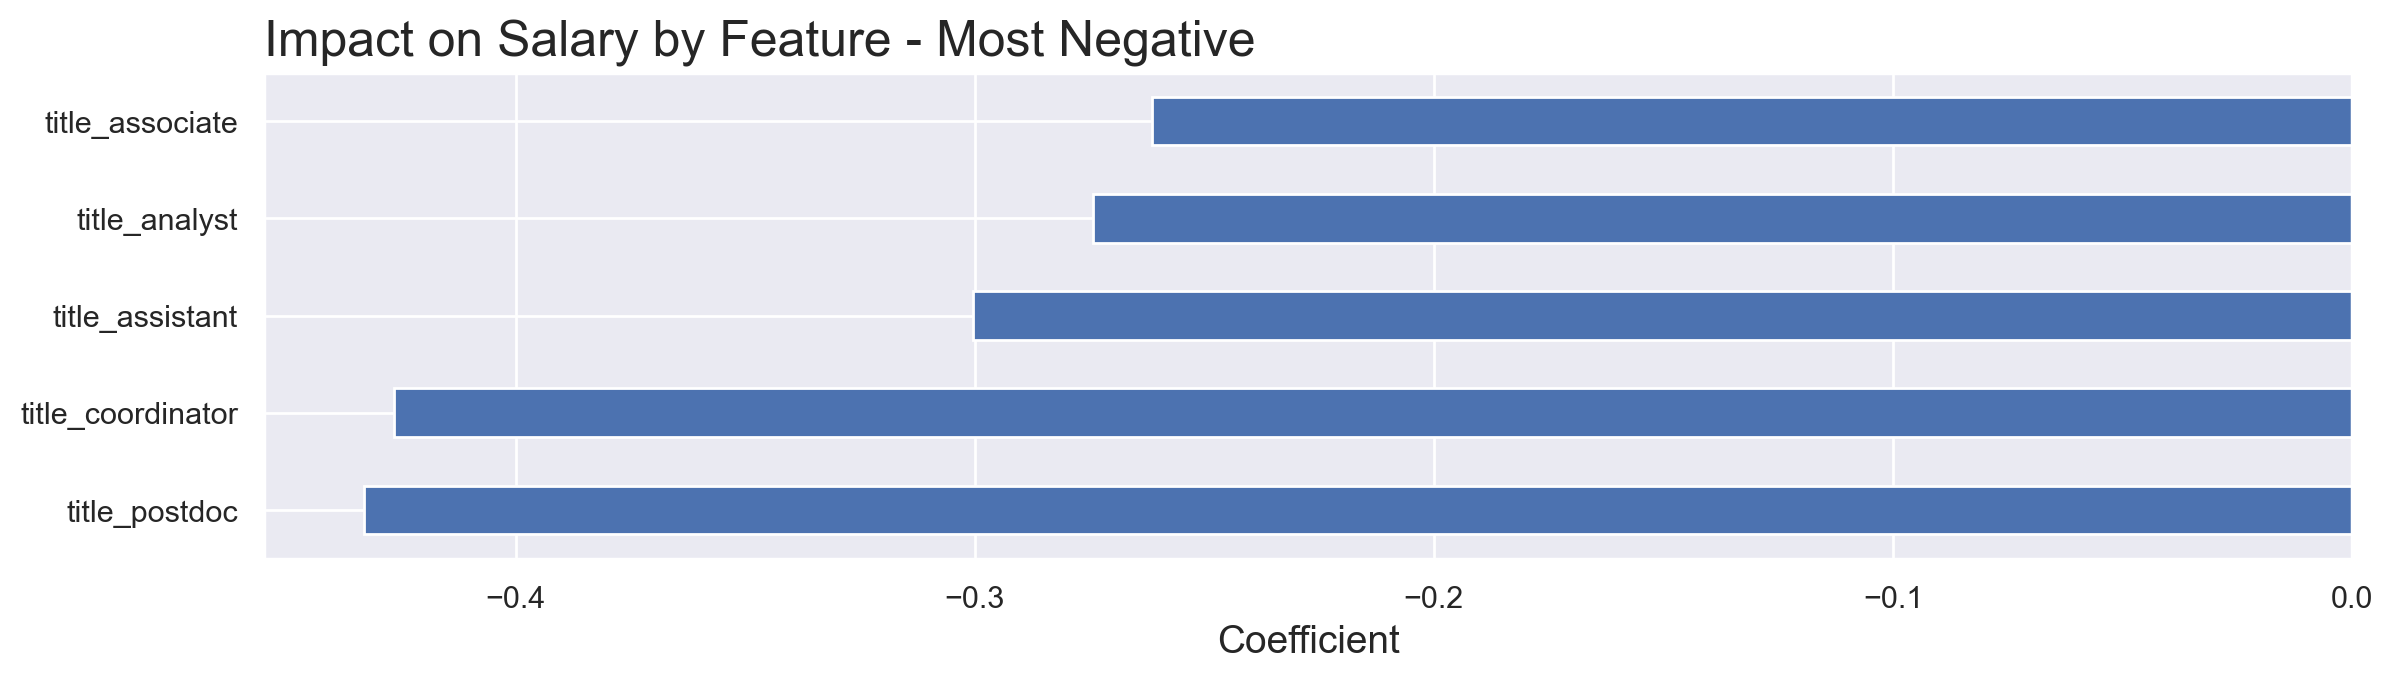

In [302]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on Salary by Feature - Most Negative', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

lr_coef['coefficients'].sort_values(ascending = True).head(5).plot(kind='barh');

Logistic Regression coeffients describe the size and the direction of the relationship between a predictor and the target variable.  
In this model, the features **title_engineer**, **title_director** and **title_senior** has a large influence on having a high paying salary since their coefficients are positive and relatively large.  
On the other side, **title_postdoc**, **title_coordinator** and **title_assistant** have negative and relatively large coefficients, so these features would likely predict a salary well below median.
<br/><br/>

Classification Report

In [303]:
predictions = logreg.predict(X_test)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1232
           1       0.71      0.80      0.75      1200

    accuracy                           0.74      2432
   macro avg       0.75      0.74      0.74      2432
weighted avg       0.75      0.74      0.74      2432



Confusion Matrix

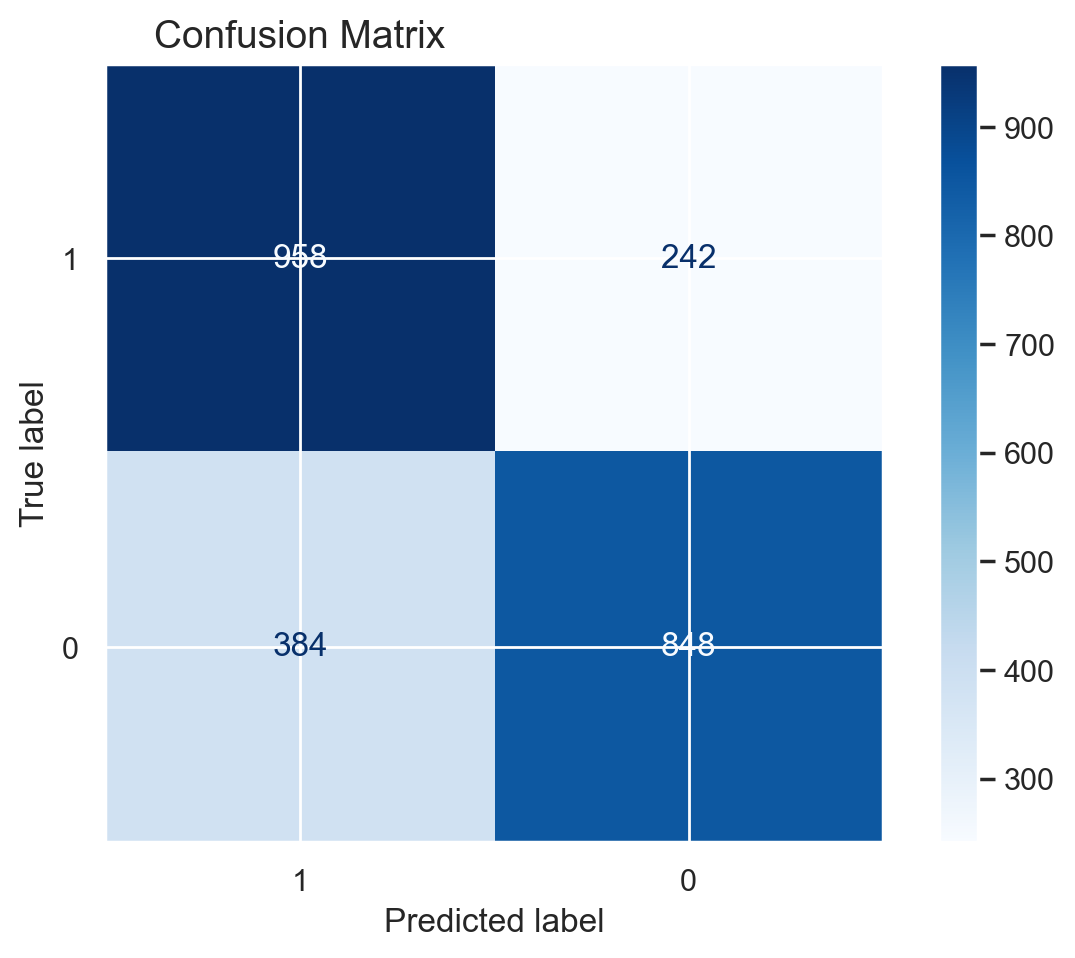

In [304]:
plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', labels=[1, 0])
plt.title('Confusion Matrix', x = 0.25, fontsize = 14)
plt.show()

ROC-AUC Curve

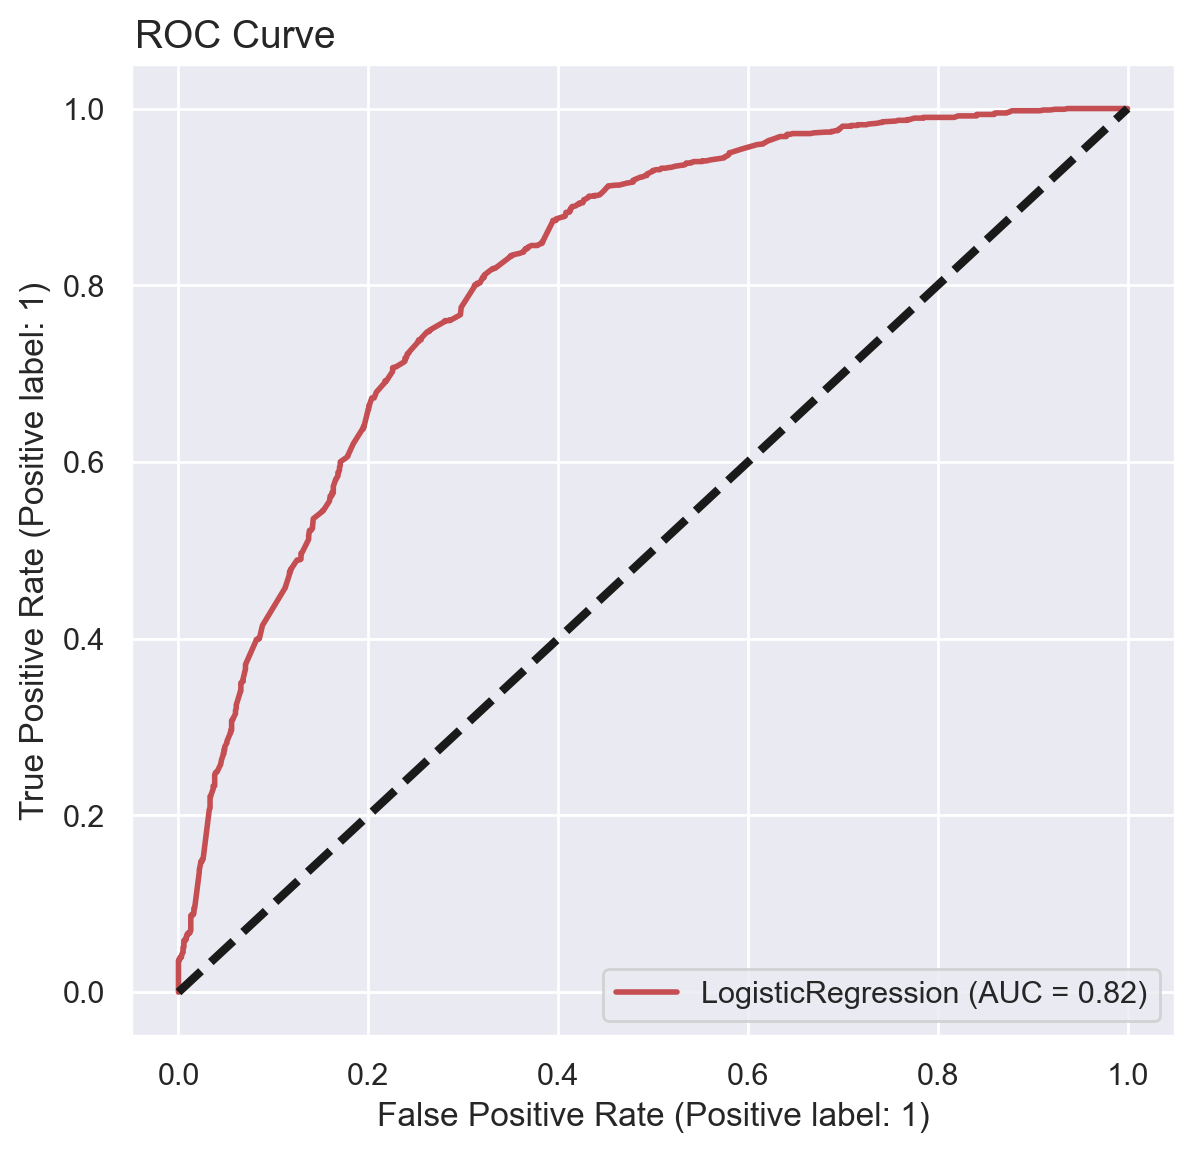

In [305]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(logreg, X_test, y_test, c='r', lw=2, ax=ax)
plt.title('ROC Curve', x = 0.1, fontsize = 14)
ax.plot([0, 1], [0, 1], 'k--', lw=3)
plt.show()

In [306]:
print('ROC-AUC Score:', roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))

ROC-AUC Score: 0.8156703192640692


Precision-Recall Curve

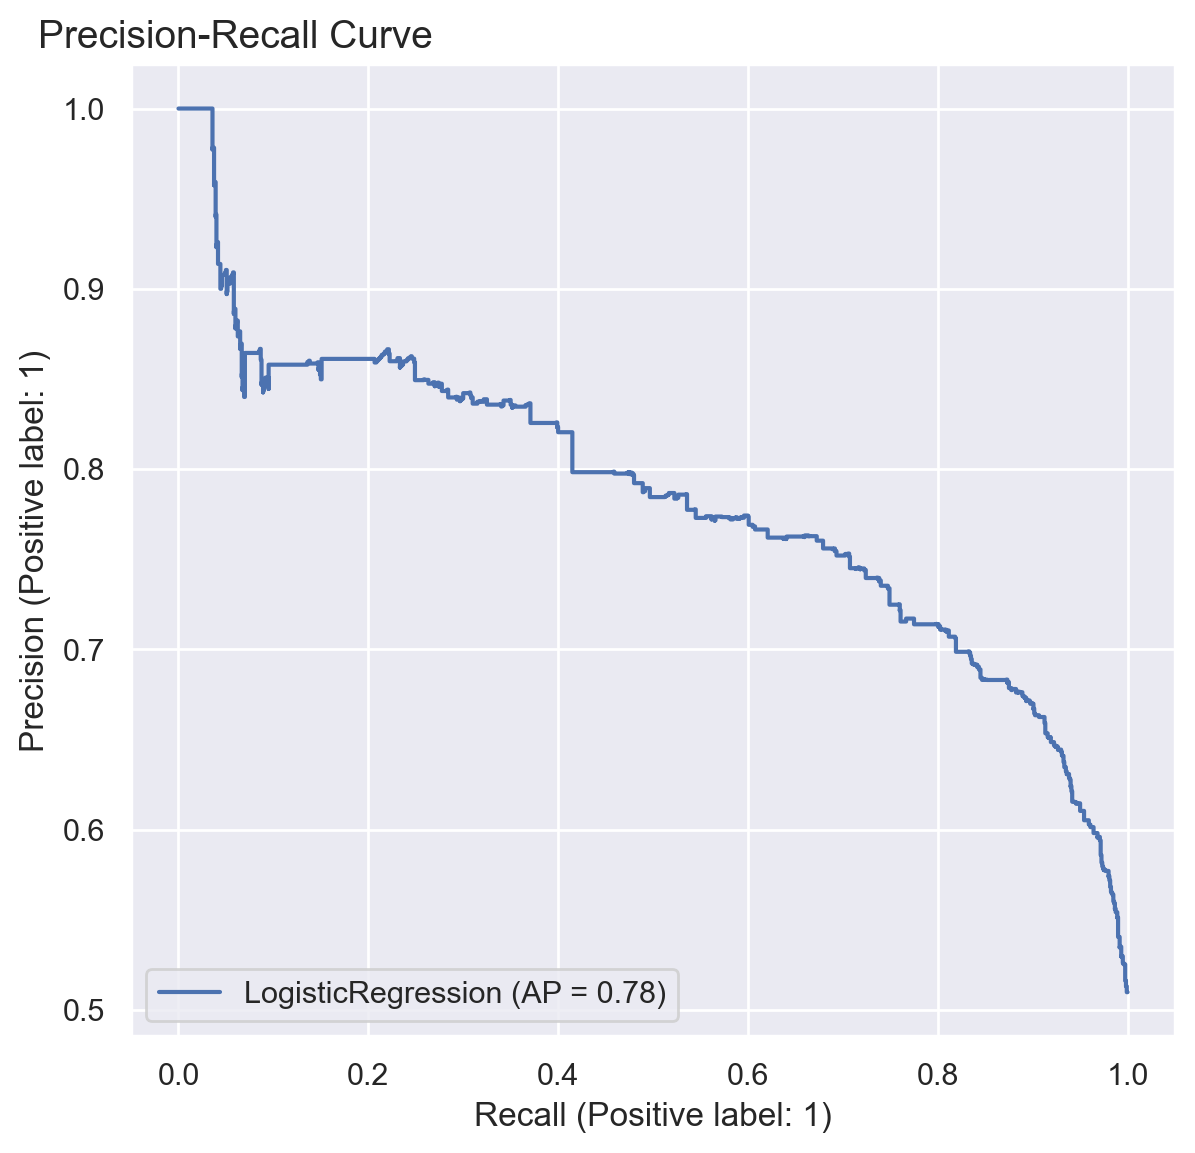

In [331]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_precision_recall_curve(logreg, X_test, y_test, ax=ax)
plt.title('Precision-Recall Curve', x = 0.1, fontsize = 14)
plt.show()

The f1-score is balanced between the two classes, and the accuracy of the model is fairly good.  
The ROC area under the curve is **0.82**, which tells us that this model has a good class separation capacity.  
The precision-recall curve shows the tradeoff between precision and recall for different threshold; here the PR-AUC is **0.78**, the curve descends in a typical non-monotonic fashion, and the precision decreases significantly at **0.75** when recall is around **0.7**.  
<br/><br/>

#### Decision Tree with Grid Search CV

In [307]:
# define gridsearch parameters
dtree_params = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50],
    'ccp_alpha': [0, 0.001, 0.005, 0.01]}


# define the model
dtree = DecisionTreeClassifier(random_state = 1)

# instantiate the gridsearch
dtc_gs = GridSearchCV(dtree, dtree_params, cv=5, n_jobs=10, verbose=1)

# find the fit in the gridsearch
dtc_gs.fit(X_train, y_train)

# pull out the model with the best parameters found in the gridsearch
dt_best = dtc_gs.best_estimator_

# calculate scores
new_dt_train = dt_best.score(X_train, y_train)
new_dt_test = dt_best.score(X_test, y_test)
new_dt_cv = (cross_val_score(dt_best, X_train, y_train, cv = 10)).mean()

# collect the scores in a dataframe to compare different models later
new_dt_df = pd.DataFrame([new_dt_train, new_dt_test, new_dt_cv], index = ['train', 'test', 'cv'], columns = ['Decision Tree'])

print('Decision Tree Classifier Scores: \n')
print('train score: ', new_dt_train)
print('test score: ', new_dt_test)
print('CV score: ', new_dt_cv)

Fitting 5 folds for each of 1936 candidates, totalling 9680 fits
Decision Tree Classifier Scores: 

train score:  0.7598190417437796
test score:  0.7405427631578947
CV score:  0.733495954559104


Feature Importance & Model Coefficients

In [312]:
# Collecting the model coefficients in a dataframe
dt_coef = pd.DataFrame(dt_best.feature_importances_, columns=['importance'], index=X.columns)
dt_coef.sort_values(by = 'importance', ascending = False)[:10]

,importance
title_engineer,0.247441
title_director,0.082206
title_architect,0.068876
title_senior,0.055401
title_scientist,0.054926
title_lead,0.049433
company_location_NY,0.046410
title_principal,0.041179
title_manager,0.036468
company_location_CA,0.033329


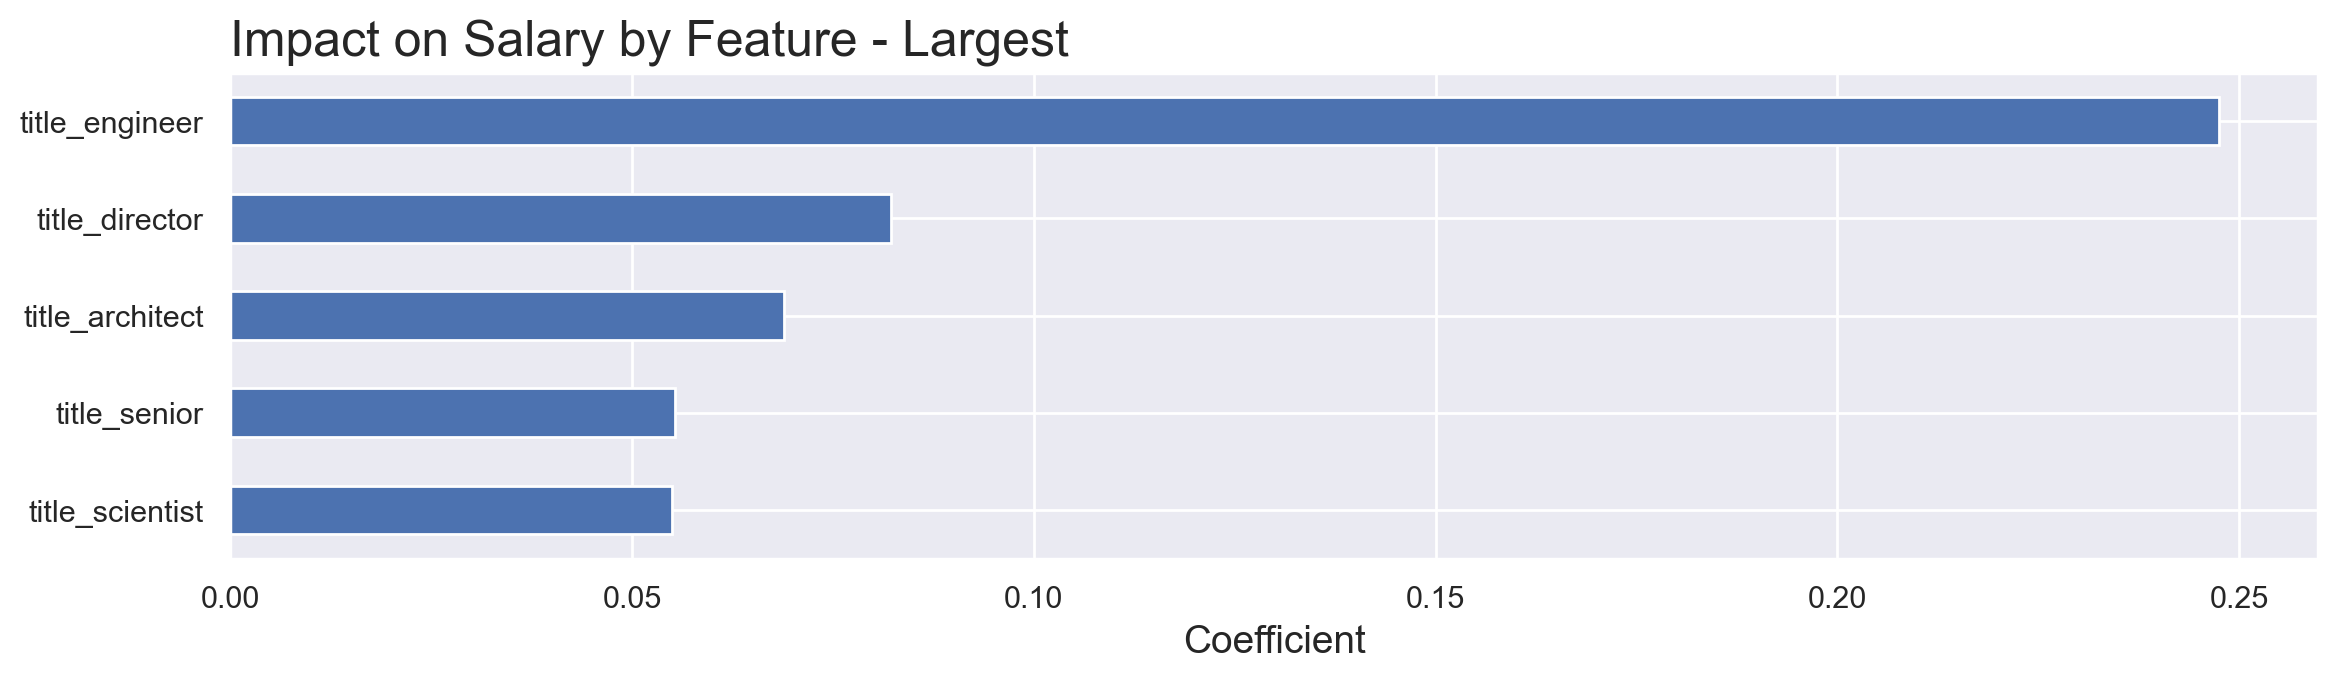

In [309]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on Salary by Feature - Largest', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

dt_coef['importance'].sort_values(ascending = True).tail(5).plot(kind='barh');

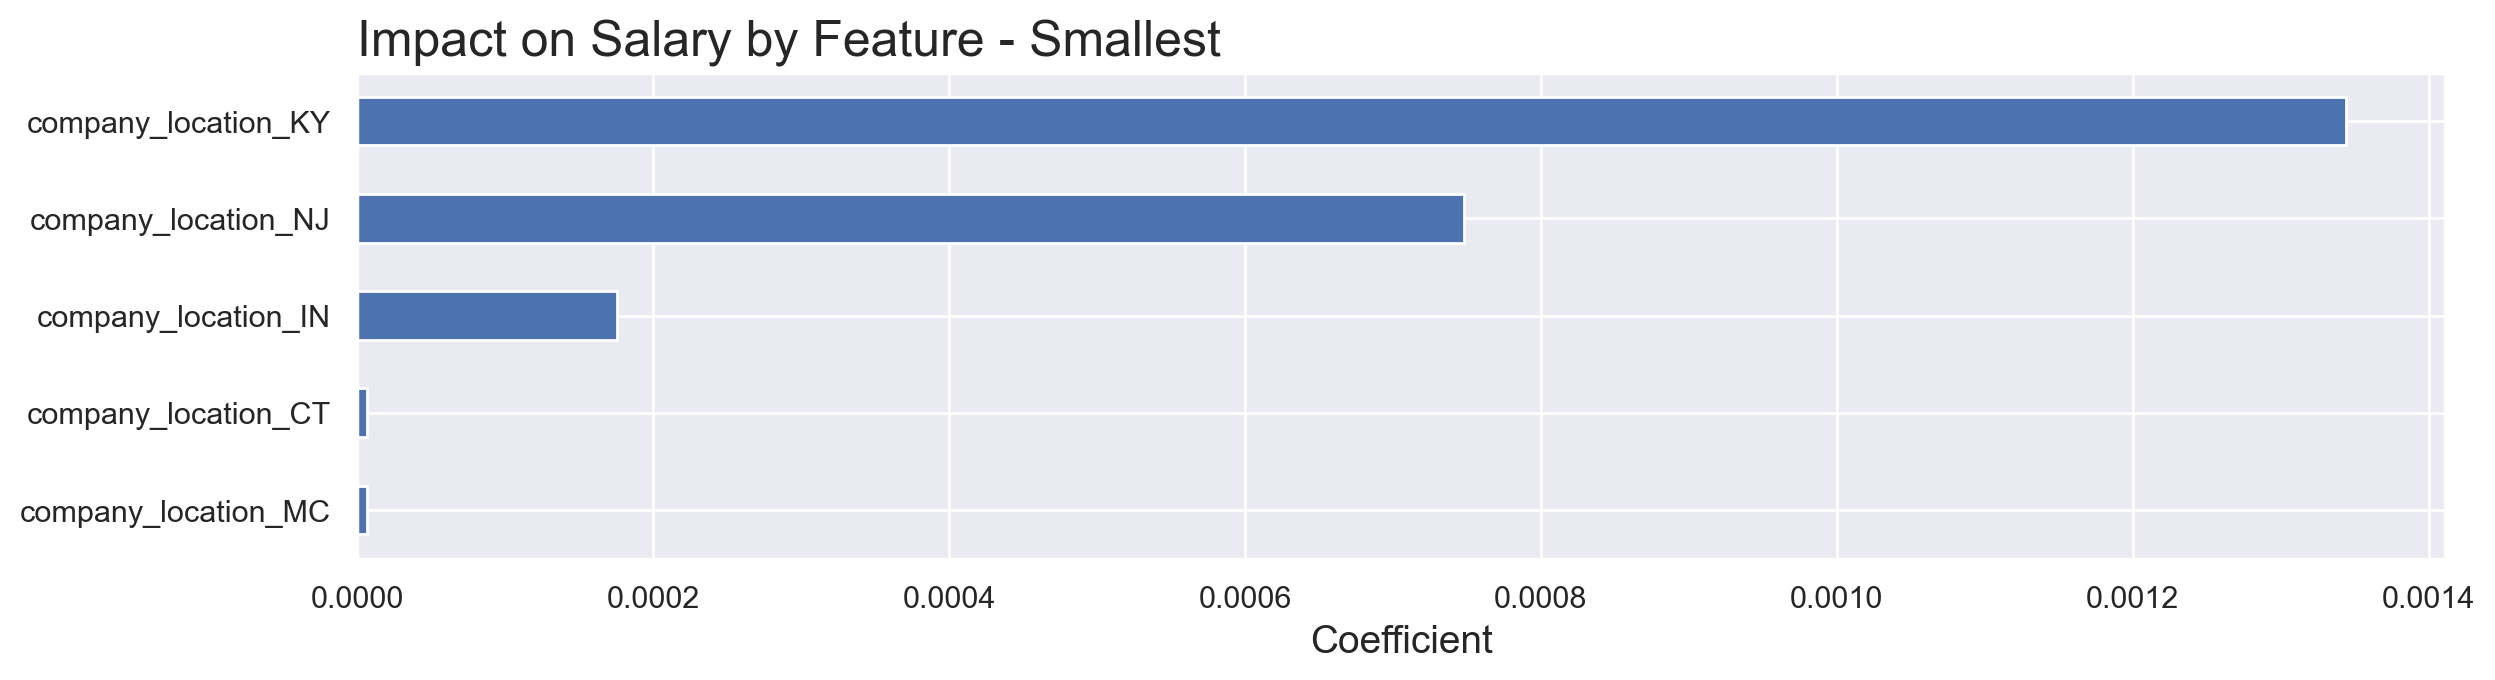

In [310]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on Salary by Feature - Smallest', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

dt_coef['importance'].sort_values(ascending = True).head(5).plot(kind='barh');

Feature importance in Decision Tree is based on node impurity and describes the size of the relationship between a predictor and the target variable.  
In this model, **title_engineer**, **title_director** and **title_architect** have the highest values, indicating that these features have the largest impact on salaries.  
On the other side, **company_location_MC**, **company_location_CT** and **company_location_IN** have the smallest impact on salaries.
<br/><br/>

Classification Report

In [313]:
predictions = dt_best.predict(X_test)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1232
           1       0.72      0.78      0.75      1200

    accuracy                           0.74      2432
   macro avg       0.74      0.74      0.74      2432
weighted avg       0.74      0.74      0.74      2432



Confusion Matrix

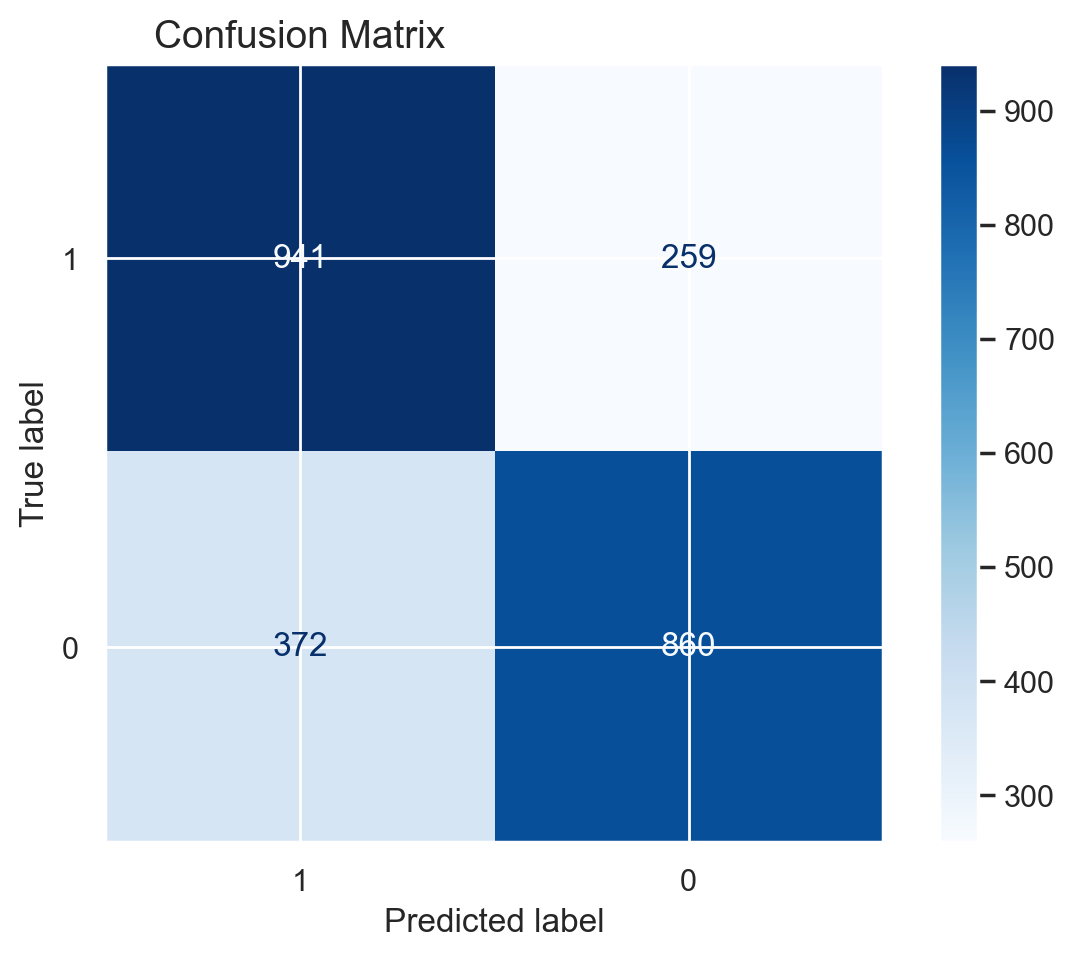

In [314]:
plot_confusion_matrix(dt_best, X_test, y_test, cmap='Blues', labels=[1, 0])
plt.title('Confusion Matrix', x = 0.25, fontsize = 14)
plt.show()

ROC-AUC Curve

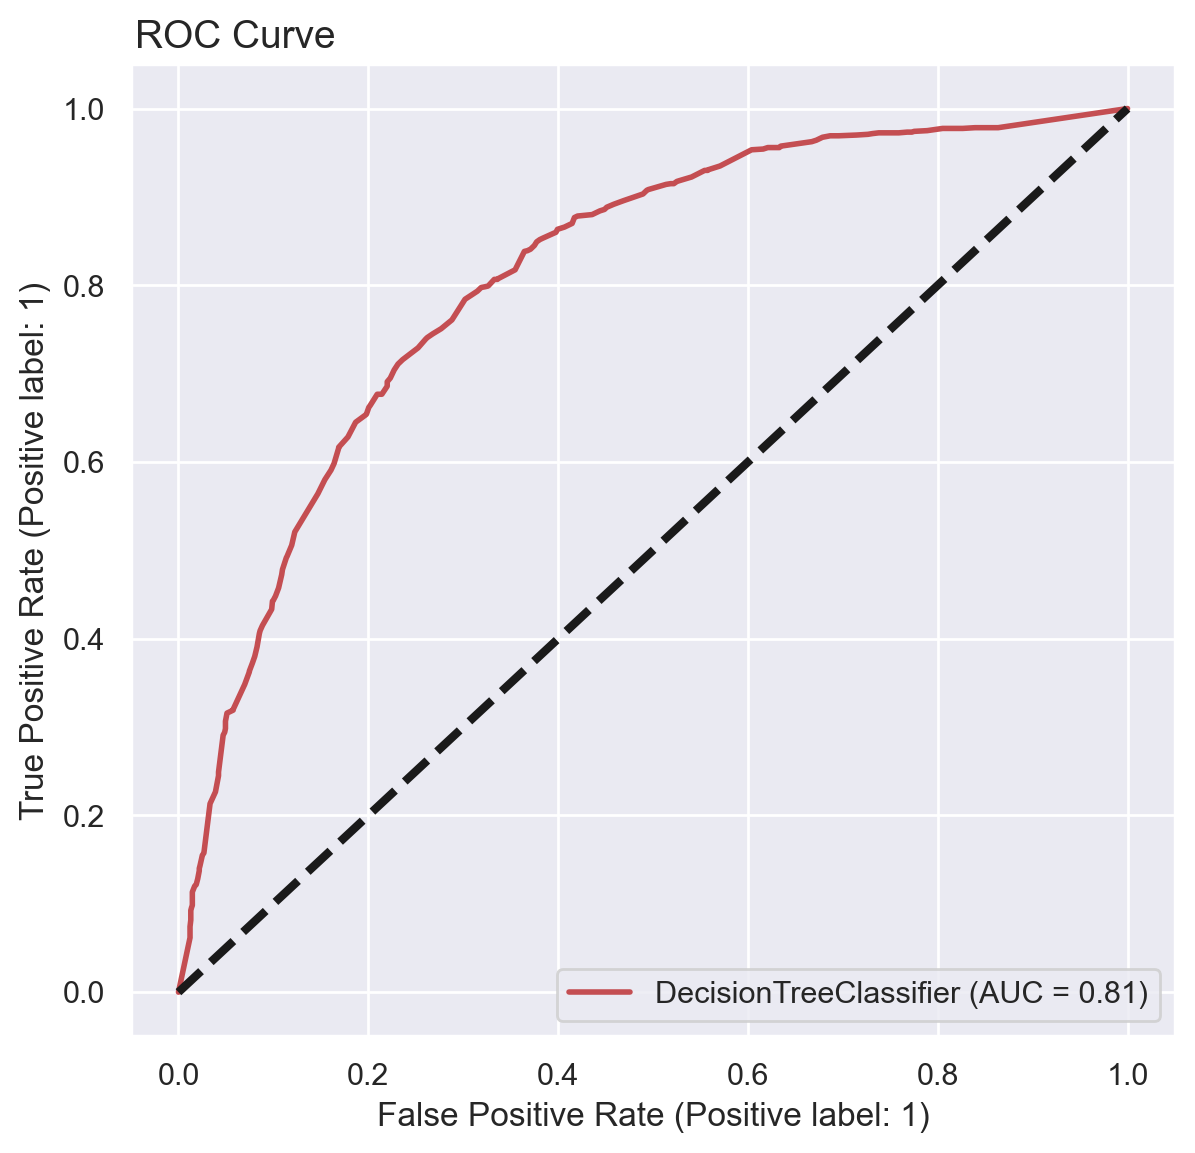

In [315]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(dt_best, X_test, y_test, c='r', lw=2, ax=ax)
plt.title('ROC Curve', x = 0.1, fontsize = 14)
ax.plot([0, 1], [0, 1], 'k--', lw=3)
plt.show()

In [316]:
print('ROC-AUC Score:', roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1]))

ROC-AUC Score: 0.8094206574675327


Precision-Recall Curve

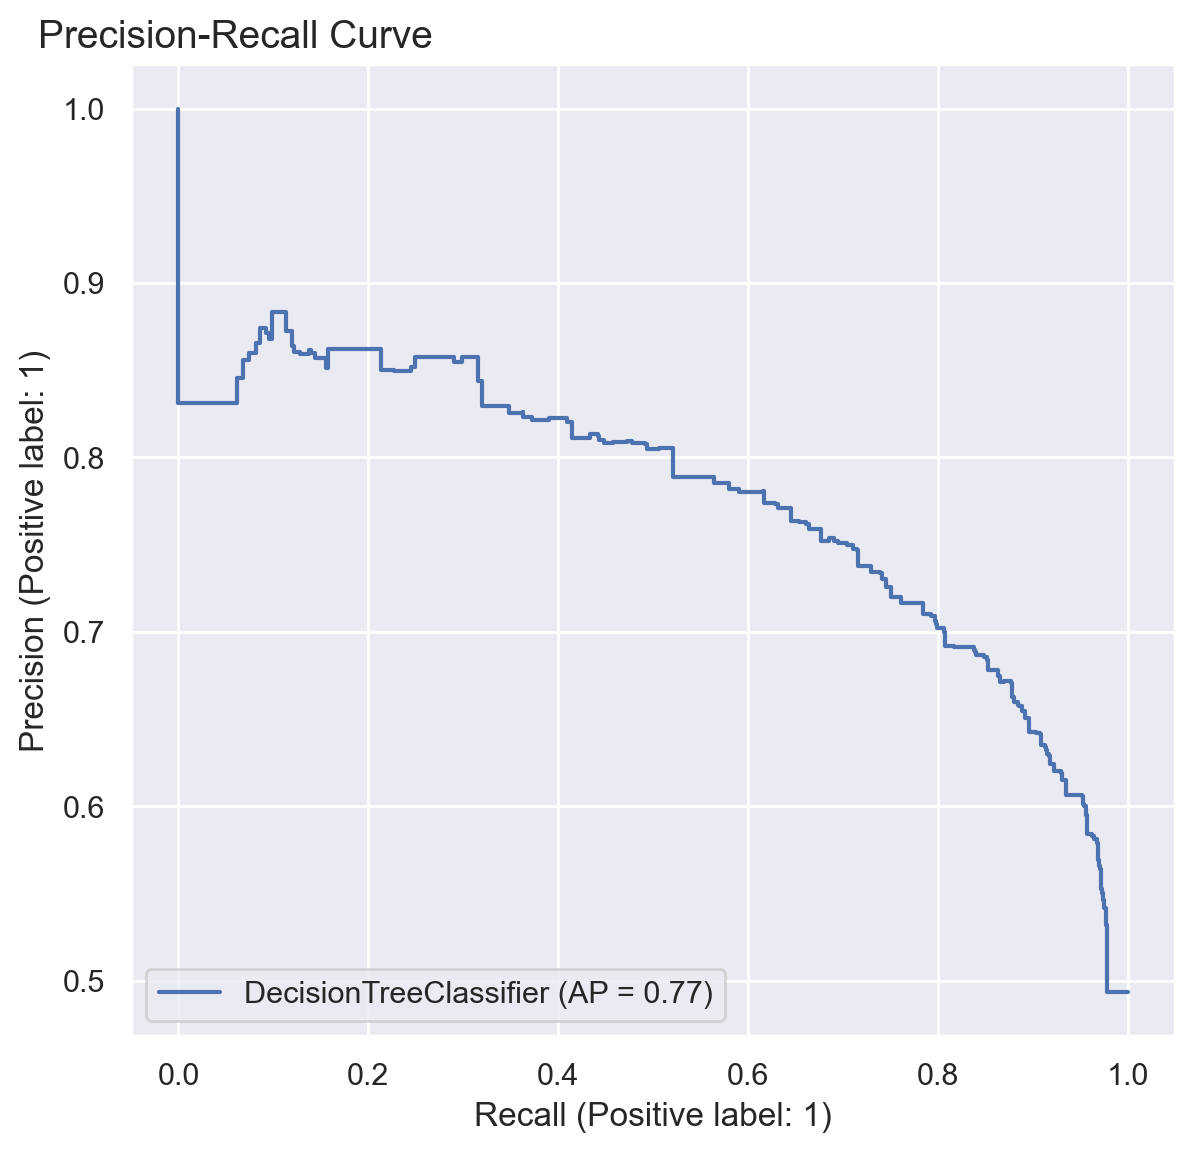

In [332]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_precision_recall_curve(dt_best, X_test, y_test, ax=ax)
plt.title('Precision-Recall Curve', x = 0.1, fontsize = 14)
plt.show()

The f1-score is balanced between the two classes, and the accuracy of the model is fairly good.  
The area under the curve is **0.81**, which tells us that this model has a good class separation capacity.  
The precision-recall curve shows the tradeoff between precision and recall for different threshold; here the PR-AUC is **0.77**, the curve descends in a typical non-monotonic fashion, and the precision decreases significantly at **0.75** when recall is around **0.7**.  
<br/><br/>

#### Random Forest with Grid Search CV

In [317]:
# define gridsearch parameters
randf_params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 3, 5, 7]}

# define the model
randf = RandomForestClassifier(random_state = 1)

# instantiate the gridsearch
rfc_gs = GridSearchCV(randf, randf_params, cv=5, n_jobs=10, verbose=1)

# find the fit in the gridsearch
rfc_gs.fit(X_train, y_train)

# pull out the model with the best parameters found in the gridsearch
rf_best = rfc_gs.best_estimator_

# calculate scores
new_rf_train = rf_best.score(X_train, y_train)
new_rf_test = rf_best.score(X_test, y_test)
new_rf_cv = (cross_val_score(rf_best, X_train, y_train, cv = 10)).mean()

# collect the scores in a dataframe to compare different models later
new_rf_df = pd.DataFrame([new_rf_train, new_rf_test, new_rf_cv], index = ['train', 'test', 'cv'], columns = ['Random Forest'])

print('Random Forest Classifier Scores: \n')
print('train score: ', new_rf_train)
print('test score: ', new_rf_test)
print('CV score: ', new_rf_cv)

Fitting 5 folds for each of 1650 candidates, totalling 8250 fits
Random Forest Classifier Scores: 

train score:  0.7557063541024059
test score:  0.7520559210526315
CV score:  0.7382250813106129


Feature Importance & Model Coefficients 

In [318]:
# Collecting the model coefficients in a dataframe
rf_coef = pd.DataFrame(rf_best.feature_importances_, columns=['importance'], index=X.columns)
rf_coef.sort_values(by = 'importance', ascending = False)[:10]

,importance
title_engineer,0.178882
title_senior,0.134930
title_director,0.072977
title_analyst,0.058214
title_architect,0.058072
company_location_NY,0.046873
title_lead,0.045935
title_principal,0.038869
title_coordinator,0.035015
title_associate,0.031042


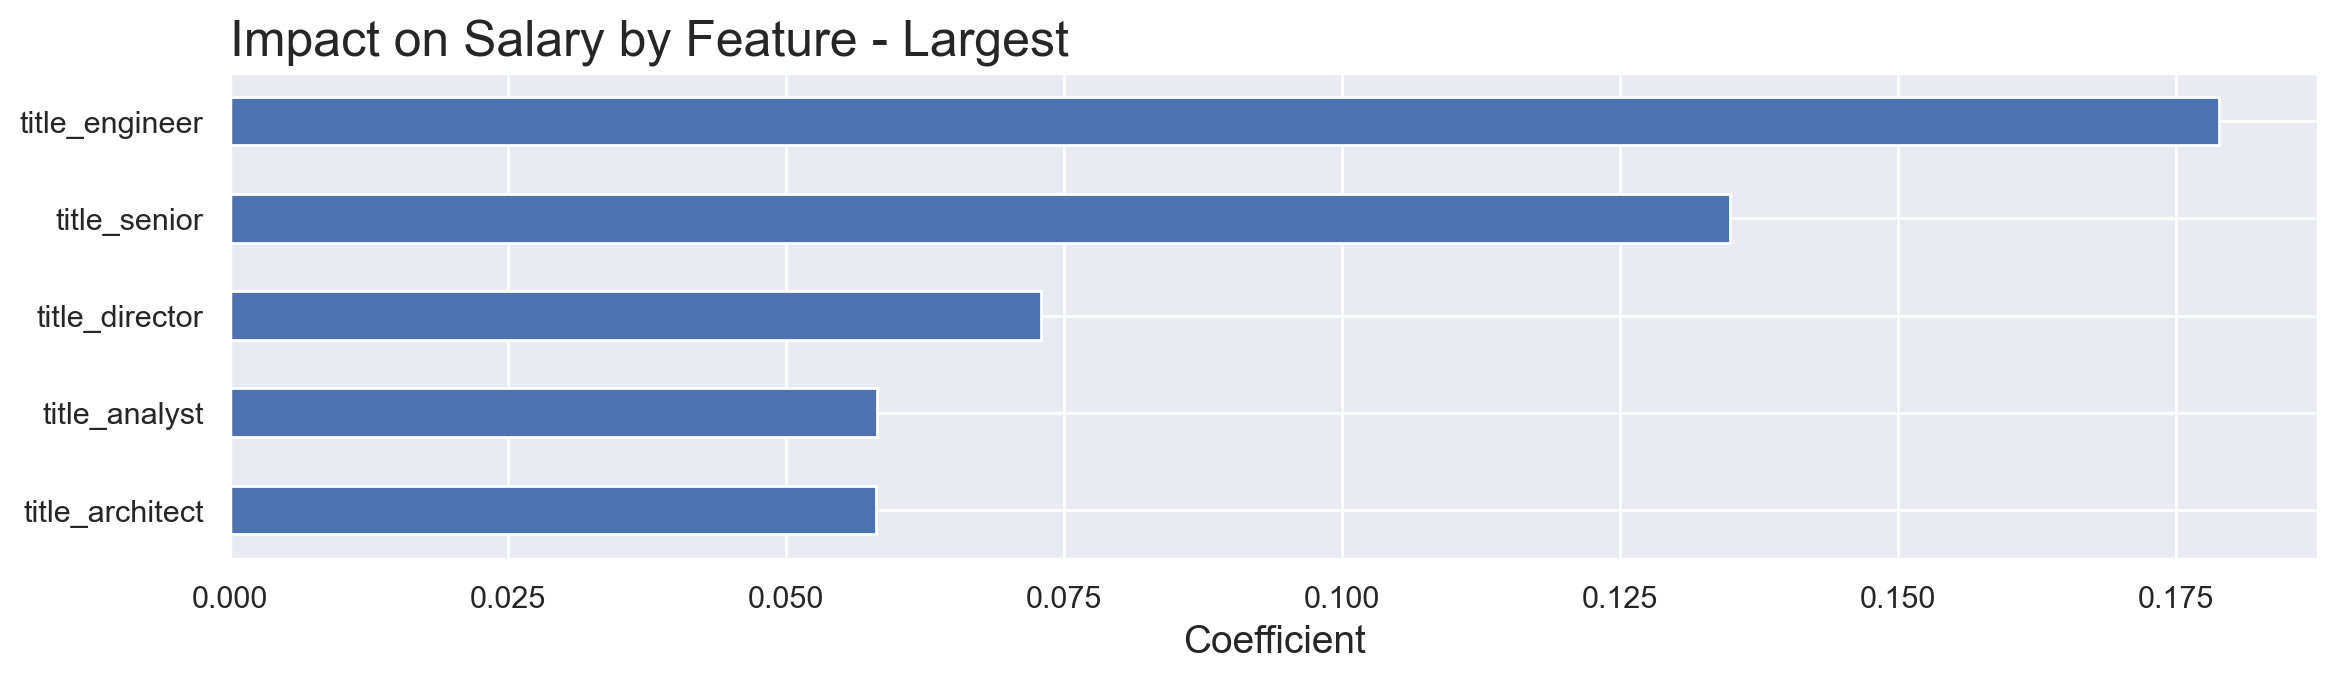

In [319]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on Salary by Feature - Largest', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

rf_coef['importance'].sort_values(ascending = True).tail(5).plot(kind='barh');

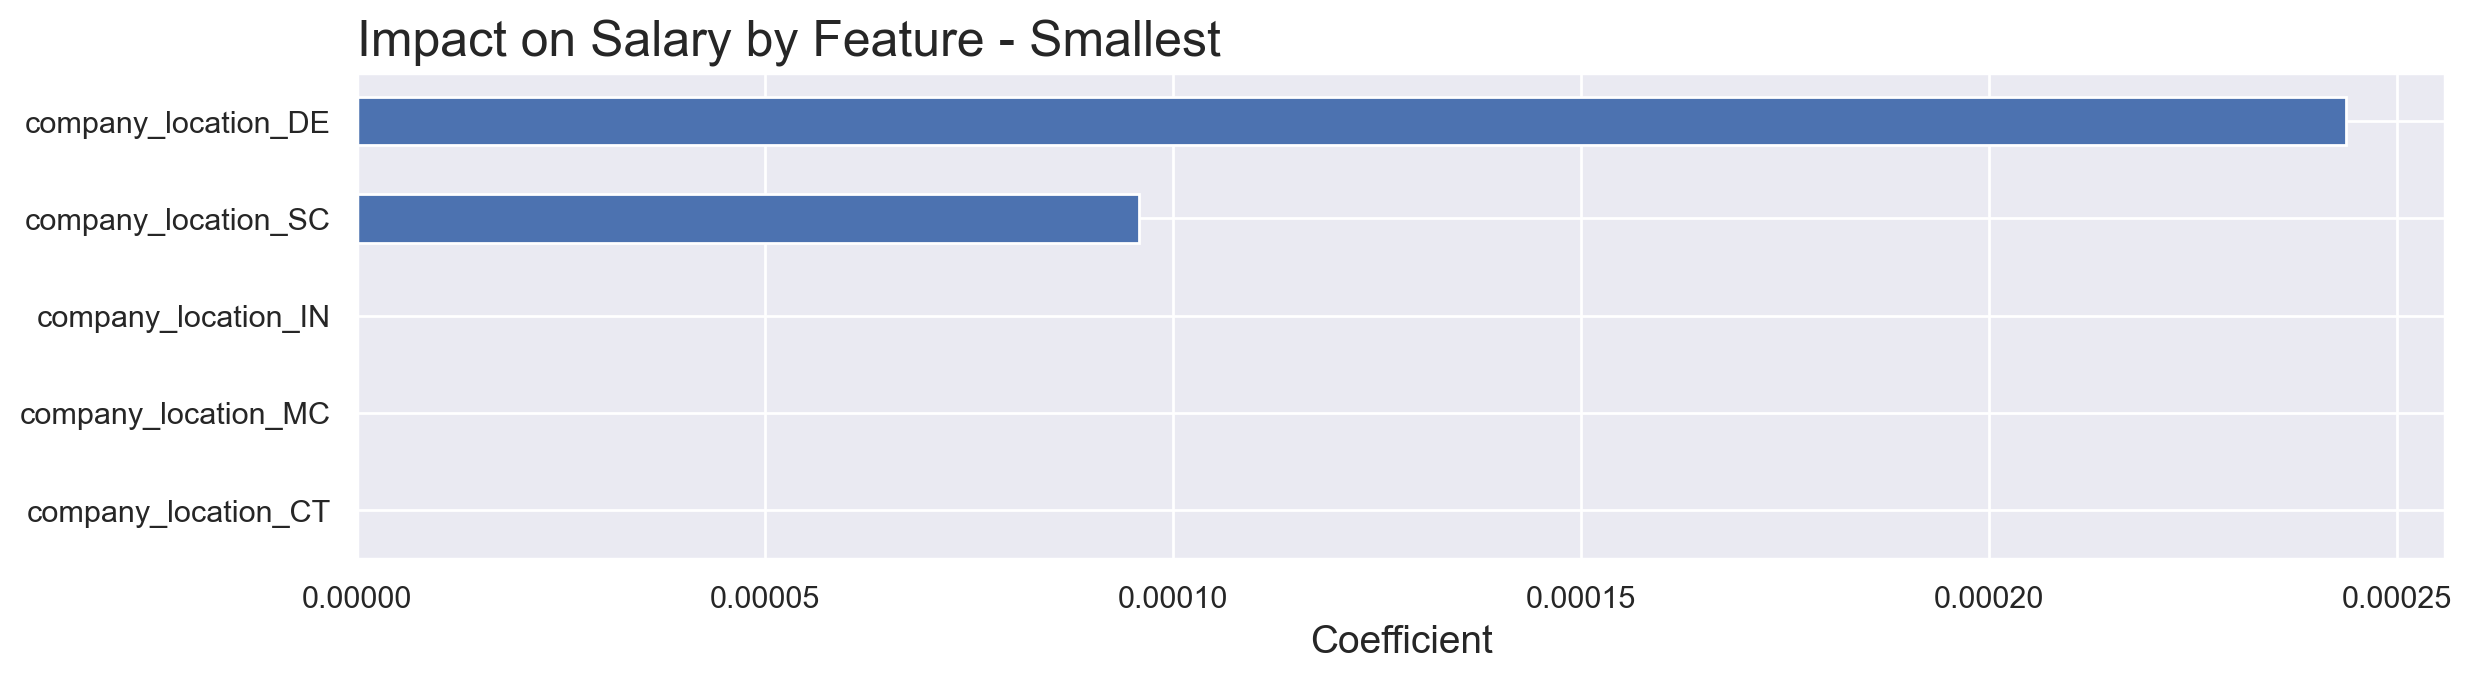

In [320]:
# Plotting the coefficients
plt.figure(figsize=(12,3))
plt.title('Impact on Salary by Feature - Smallest', loc='left', fontsize = 18)
plt.xlabel('Coefficient', fontsize = 14)

rf_coef['importance'].sort_values(ascending = True).head(5).plot(kind='barh');

Feature importance in Random Forest is based on node impurity and describes the size of the relationship between a predictor and the target variable.  
In this model, **title_engineer**, **title_senior** and **title_director** have the highest values, indicating that these features have the largest impact on salaries.  
On the other side, **company_location_CT**, **company_location_MC** and **company_location_IN** have the smallest impact on salaries.
<br/><br/>

Classification Report

In [321]:
predictions = rf_best.predict(X_test)

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1232
           1       0.72      0.81      0.76      1200

    accuracy                           0.75      2432
   macro avg       0.76      0.75      0.75      2432
weighted avg       0.76      0.75      0.75      2432



Confusion Matrix

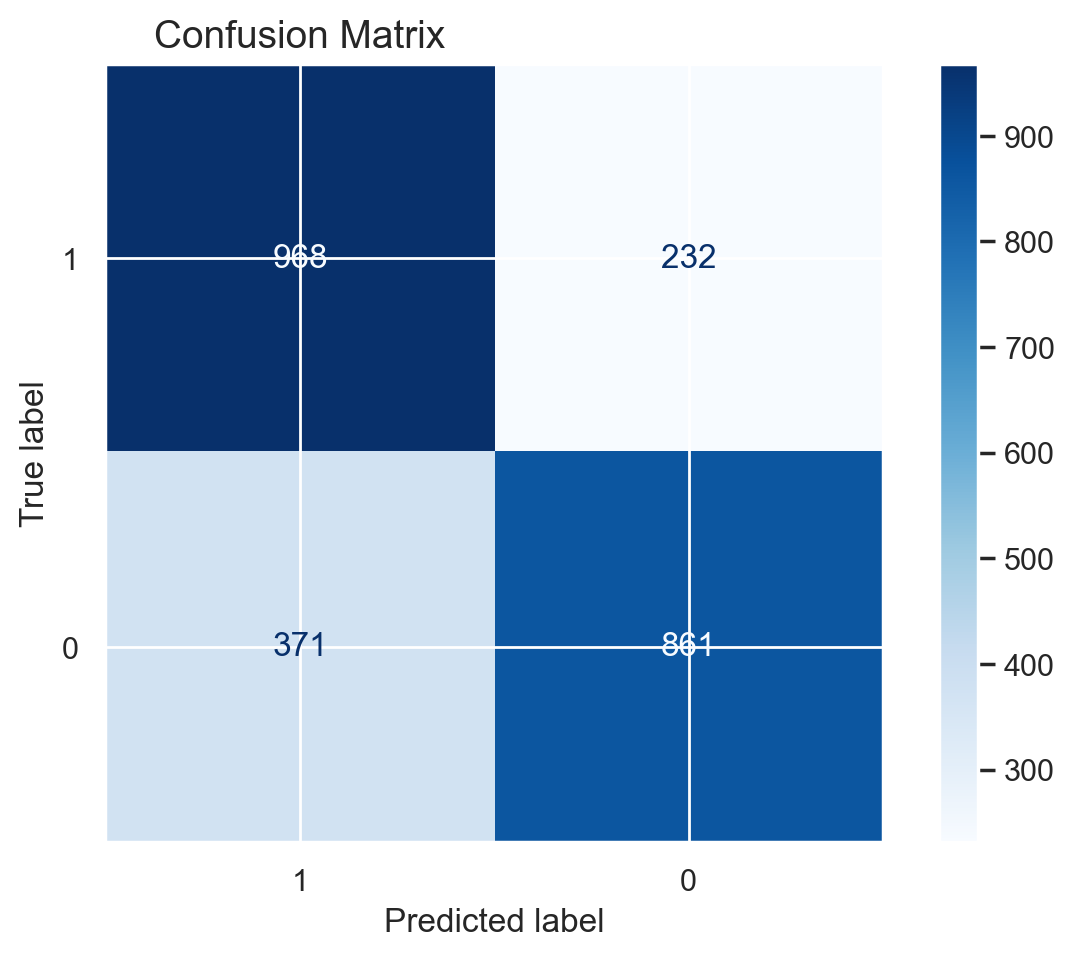

In [322]:
plot_confusion_matrix(rf_best, X_test, y_test, cmap='Blues', labels=[1, 0])
plt.title('Confusion Matrix', x = 0.25, fontsize = 14)
plt.show()

ROC-AUC Curve

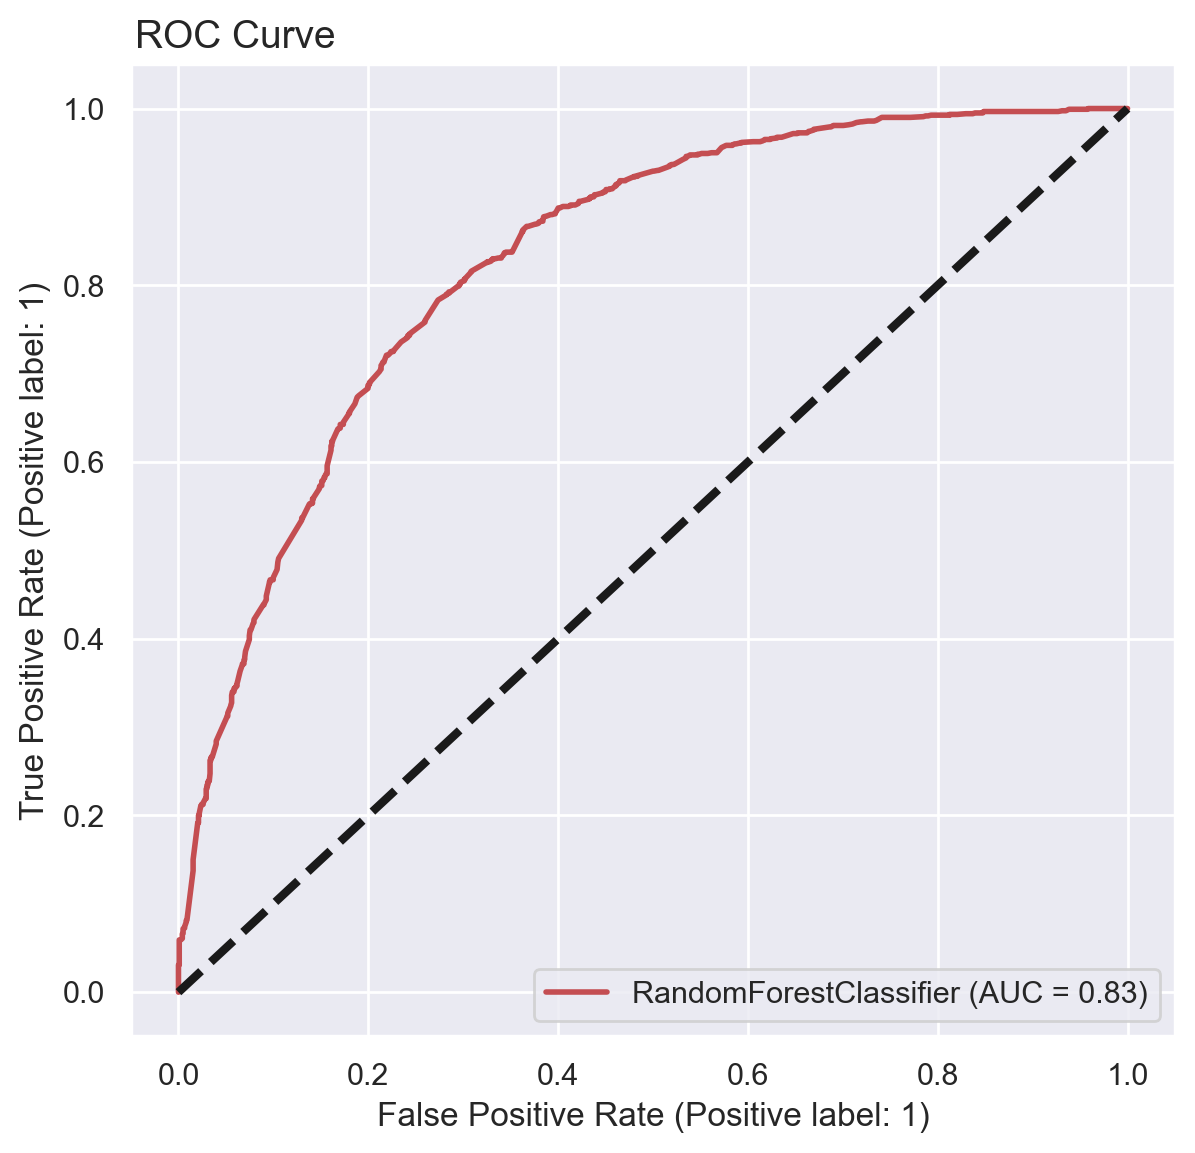

In [323]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_roc_curve(rf_best, X_test, y_test, c='r', lw=2, ax=ax)
plt.title('ROC Curve', x = 0.1, fontsize = 14)
ax.plot([0, 1], [0, 1], 'k--', lw=3)
plt.show()

In [333]:
print('ROC-AUC Score:', roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1]))

ROC-AUC Score: 0.828427353896104


Precision-Recall Curve

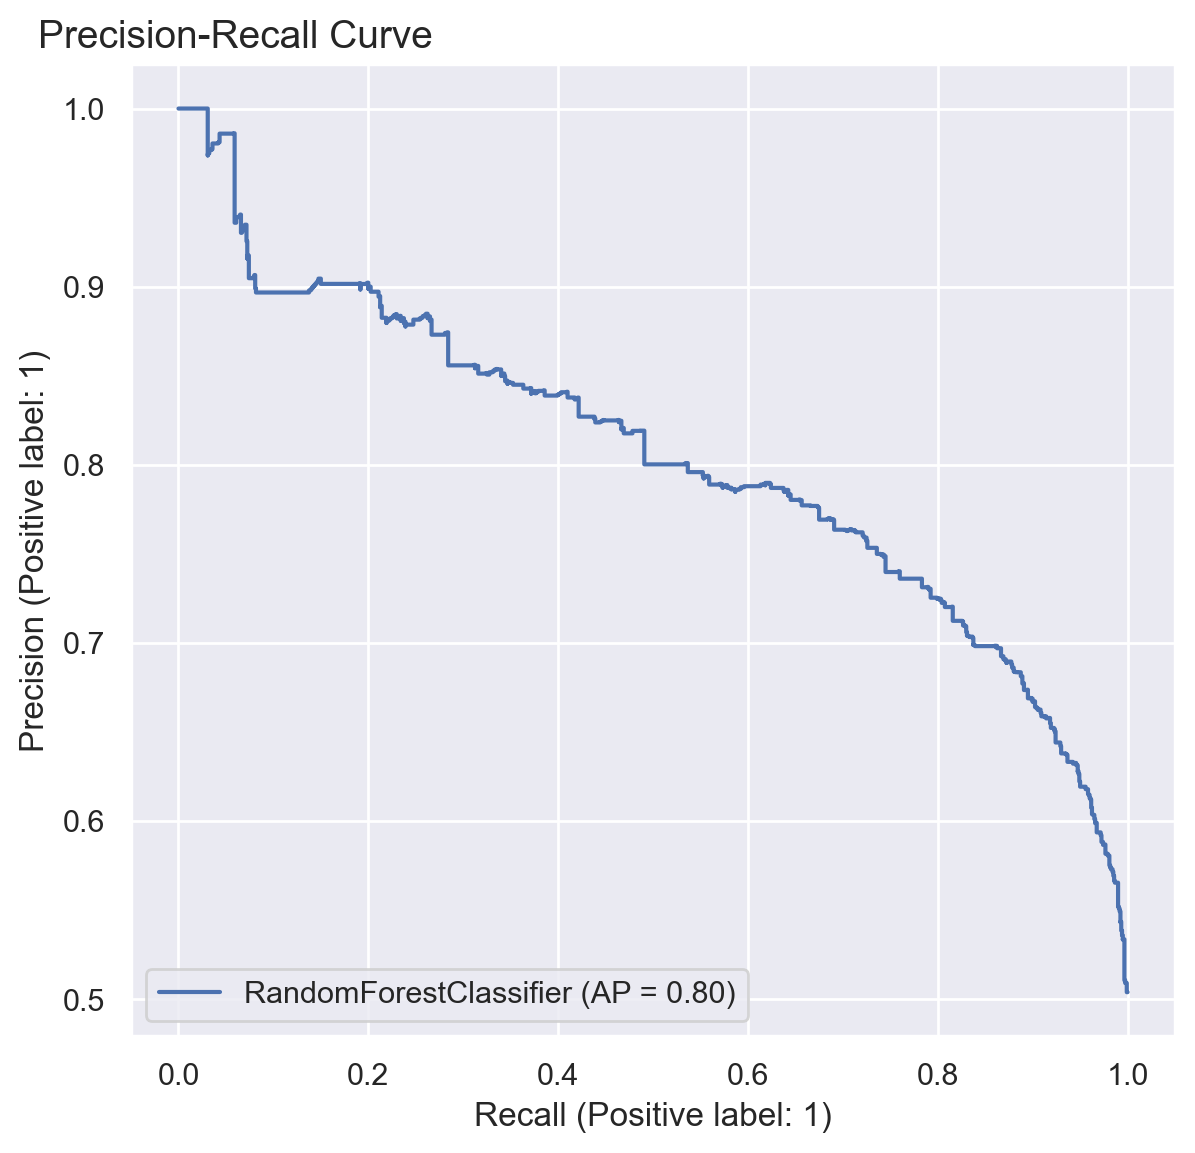

In [334]:
fig, ax = plt.subplots(figsize=(6, 6))
plot_precision_recall_curve(rf_best, X_test, y_test, ax=ax)
plt.title('Precision-Recall Curve', x = 0.1, fontsize = 14)
plt.show()

The f1-score is balanced between the two classes, and the accuracy of the model is fairly good.  
The area under the curve is **0.83**, which tells us that this model has a good class separation capacity.  
The precision-recall curve shows the tradeoff between precision and recall for different threshold; here the PR-AUC is **0.78**, the curve descends in a typical non-monotonic fashion, and the precision decreases significantly at **0.75** when recall is around **0.7**.  
<br/><br/>

#### Model Scores Evaluation

In [325]:
models_2 = pd.concat([new_logreg_df, new_dt_df, new_rf_df], axis = 1)
models_2

,Logistic Reg,Decision Tree,Random Forest
train,0.739873,0.759819,0.755706
test,0.742599,0.740543,0.752056
cv,0.734212,0.733496,0.738225


In the three models implemented above, **Random Forest** achieved the highest CV score of **0.7382**  

The most important features for this model were **title_engineer**, **title_senior** and **title_director**. According to the Random Forest Classifier, upper level positions and engineering related jobs have the biggest impact in predicting job salaries.

Although the Random Forest Classifer performed the best, all the three model scores were quite close to one another, and were about 0.23 higher than the baseline of 0.5 indicating that the models made substantially better predictions.  
Since these models did significantly better than the previous models that relied only on location, it can be concluded that factors such as job titles and roles can affect the salary level.  
<br/><br/>

### Model evaluation:

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs.


- Use cross-validation to evaluate your models.
- Evaluate the accuracy, AUC, precision and recall of the models.
- Plot the ROC and precision-recall curves for at least one of your models.

In [15]:
## YOUR CODE HERE

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### Bonus:

- Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.
- Obtain the ROC/precision-recall curves for the different models you studied (at least the tuned model of each category) and compare.

In [16]:
## YOUR CODE HERE

### Summarize your results in an executive summary written for a non-technical audience.
   
- Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

In [17]:
## YOUR TEXT HERE IN MARKDOWN FORMAT 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### BONUS

Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

In [18]:
## YOUR LINK HERE IN MARKDOWN FORMAT 